In [ ]:
%matplotlib inline
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Desarrollo

# Sets de datos

Nos dieron 6 archivos .csv con datos para analizar:

    - postulantes_educacion = ‘fiuba_1_postulantes_educacion.csv'

    - postulantes_genero_edad = ‘fiuba_2_postulantes_genero_y_edad.csv'

    - vistas = 'fiuba_3_vistas.csv'

    - postulaciones = 'fiuba_4_postulaciones.csv'

    - avisos_online = 'fiuba_5_avisos_online.csv'

    - avisos_detalles = 'fiuba_6_avisos_detalle.csv'

### Analizamos el set de datos: ‘postulantes_educacion’

In [2]:
postulantes_educacion = pd.read_csv('/home/luupesado/7506_Datos/2018/datos_navent_fiuba/fiuba_1_postulantes_educacion.csv')

Vemos que forma tienen los datos

In [3]:
postulantes_educacion.head()

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [4]:
postulantes_educacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298231 entries, 0 to 298230
Data columns (total 3 columns):
idpostulante    298231 non-null object
nombre          298231 non-null object
estado          298231 non-null object
dtypes: object(3)
memory usage: 6.8+ MB


Vemos que es un set de datos completo, es decir que no tiene valores nulos en ninguna de sus columnas.

Comprobamos que no haya ids repetidos:

In [4]:
postulantes_educacion['idpostulante'].value_counts().head()

YlMLGD     9
54MQGz     8
EZD29      8
Ez0LBk9    7
8M21pBL    7
Name: idpostulante, dtype: int64

Vemos que si los hay, por lo que vamos a filtarlos quedandonos que el nivel educativo superior de cada postulante

 Vamos a analizar el nivel educativo de los postulantes.

Qusimos ver la distribucion del nivel educativo de los estudiantes, por lo que utilizamos la columna nombre

In [5]:
postulantes_educacion['nombre'].value_counts()

Secundario           110256
Universitario        104295
Terciario/Técnico     47733
Otro                  24748
Posgrado               7387
Master                 3598
Doctorado               214
Name: nombre, dtype: int64

En este caso hay categorías con tildes, la cual despues traen complicaciones a la hora de graficar con matplotlib que no las soporta, por lo que vamos a cambiarle el nombre.

In [6]:
postulantes_educacion['nombre'] = postulantes_educacion['nombre'].astype('string')

In [7]:
import unicodedata
def elimina_tildes(s):
   return ''.join((c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn'))

In [8]:
postulantes_educacion['nombre'] = postulantes_educacion['nombre'].apply(lambda x: elimina_tildes(x.decode('utf-8')))

Nos dimos cuenta de que el nivel educativo no depende solo de la columna nombre, sino que tambien depende del estado.

In [9]:
postulantes_educacion['estado'].value_counts()

Graduado      194474
En Curso       78531
Abandonado     25226
Name: estado, dtype: int64

Por lo tanto quisimos crear una columna categórica que incluya a ambos campos

In [10]:
postulantes_educacion['nombre-estado'] = postulantes_educacion['nombre'] + ' - ' + postulantes_educacion['estado']

In [11]:
postulantes_educacion['nombre-estado'] = postulantes_educacion['nombre-estado'].astype('category')

In [12]:
postulantes_educacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298231 entries, 0 to 298230
Data columns (total 4 columns):
idpostulante     298231 non-null object
nombre           298231 non-null object
estado           298231 non-null object
nombre-estado    298231 non-null category
dtypes: category(1), object(3)
memory usage: 7.1+ MB


Ahora queremos que estas categorías tengasn un orden, para que un doctorado sea mayor a un secundario

In [13]:
categories_order = ['Otro - Abandonado',
 'Otro - En Curso',                                        
 'Otro - Graduado', 
'Secundario - Abandonado',
 'Secundario - En Curso',
 'Secundario - Graduado',
 'Terciario/Tecnico - Abandonado',
 'Terciario/Tecnico - En Curso',
 'Terciario/Tecnico - Graduado',
 'Universitario - Abandonado',
 'Universitario - En Curso',
 'Universitario - Graduado',
'Posgrado - Abandonado',
 'Posgrado - En Curso',
 'Posgrado - Graduado',
 'Master - Abandonado',
 'Master - En Curso',
 'Master - Graduado',
'Doctorado - Abandonado',
 'Doctorado - En Curso',
 'Doctorado - Graduado']

In [14]:
postulantes_educacion['nombre-estado'] = postulantes_educacion['nombre-estado'].cat \
                                        .set_categories(categories_order, ordered = True)

Finalmente nos quedamos con el mayor grado de cada uno.

In [15]:
postulantes_educacion = postulantes_educacion.sort_values('nombre-estado', ascending= False).drop_duplicates(subset='idpostulante', keep = 'first')

In [16]:
postulantes_educacion['nombre-estado'].value_counts().sort_index()

Otro - Abandonado                   219
Otro - En Curso                     186
Otro - Graduado                     933
Secundario - Abandonado            2681
Secundario - En Curso              3397
Secundario - Graduado             56333
Terciario/Tecnico - Abandonado     3034
Terciario/Tecnico - En Curso       9730
Terciario/Tecnico - Graduado      14665
Universitario - Abandonado         9895
Universitario - En Curso          46685
Universitario - Graduado          31258
Posgrado - Abandonado               248
Posgrado - En Curso                1730
Posgrado - Graduado                4072
Master - Abandonado                 131
Master - En Curso                  1449
Master - Graduado                  1895
Doctorado - Abandonado               15
Doctorado - En Curso                 91
Doctorado - Graduado                105
Name: nombre-estado, dtype: int64

Vemos que funciono el ordenamiento

Comprobamos que ya no tenemos duplicados

In [17]:
postulantes_educacion['idpostulante'].value_counts().head()

Rz6VOrE    1
bOJLX14    1
96XOwba    1
1QrA4ez    1
5avONz     1
Name: idpostulante, dtype: int64

Ahora, con los datos filtrados, nos fijamos cómo quedó la distrubucion de estados

In [18]:
postulantes_educacion['estado'].value_counts()

Graduado      109261
En Curso       63268
Abandonado     16223
Name: estado, dtype: int64

Lo graficamos así se ve mejor

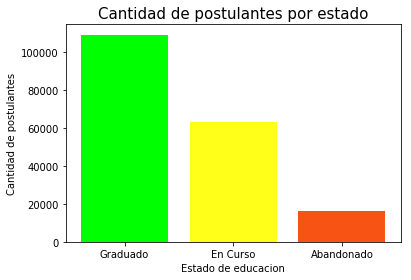

In [34]:
fig, ax = plt.subplots()
ax.bar(np.arange(3), postulantes_educacion['estado'].value_counts(), color = ['#00ff00', '#ffff1a','#f65314'])
ax.set_ylabel('Cantidad de postulantes')
ax.set_xlabel('Estado de educacion')
ax.set_xticks(np.arange(3))
ax.set_xticklabels( postulantes_educacion['estado'].value_counts().index, rotation=0)
ax.set_title('Cantidad de postulantes por estado', size = 15)
    

Agrupamos para ver mejor la informacion

In [36]:
postulantes_nombre = postulantes_educacion.groupby(['estado', 'nombre'])['idpostulante'].count()
postulantes_nombre

estado      nombre           
Abandonado  Doctorado               15
            Master                 131
            Otro                   219
            Posgrado               248
            Secundario            2681
            Terciario/Tecnico     3034
            Universitario         9895
En Curso    Doctorado               91
            Master                1449
            Otro                   186
            Posgrado              1730
            Secundario            3397
            Terciario/Tecnico     9730
            Universitario        46685
Graduado    Doctorado              105
            Master                1895
            Otro                   933
            Posgrado              4072
            Secundario           56333
            Terciario/Tecnico    14665
            Universitario        31258
Name: idpostulante, dtype: int64

Hago un gráfico de los estados, ahora por tipo de educación para que se pueda apreciar mejor.

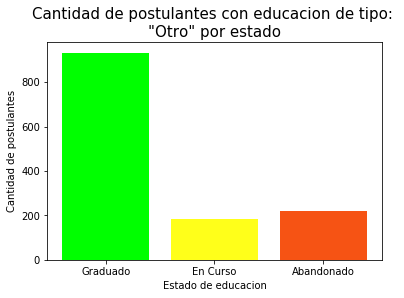

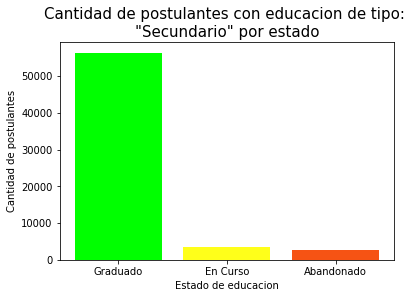

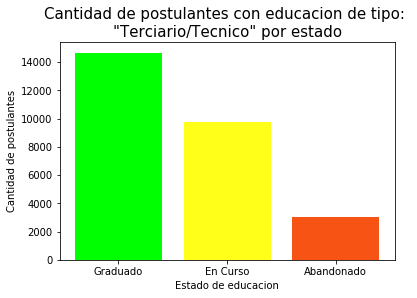

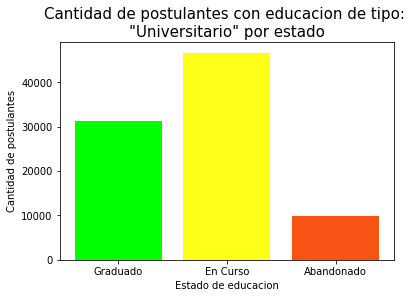

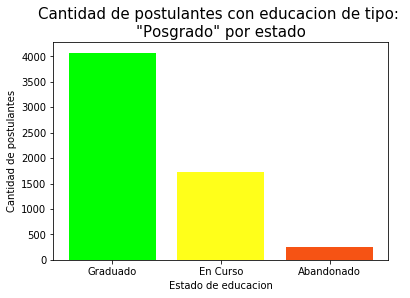

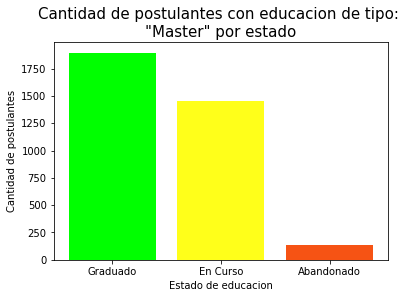

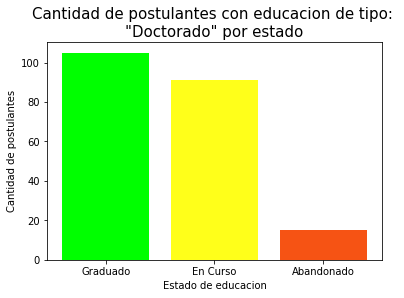

In [43]:
estados = postulantes_educacion['estado'].value_counts().index
nombres = ['Otro', 'Secundario','Terciario/Tecnico','Universitario','Posgrado','Master','Doctorado']

width = 0.35
for nombre in nombres:
    postulantes_estado = []
    fig, ax = plt.subplots()
    for estado in estados:
        postulantes_estado.append(postulantes_nombre[estado][nombre])
    ax.bar(np.arange(3), postulantes_estado, color = ['#00ff00', '#ffff1a','#f65314'])
    ax.set_ylabel('Cantidad de postulantes')
    ax.set_xlabel('Estado de educacion')
    ax.set_xticks(np.arange(3))
    ax.set_xticklabels(estados,rotation=0)
    ax.set_title('Cantidad de postulantes con educacion de tipo: \n"' + nombre + '" por estado', size = 15)
    
    

Vemos que en la mayoría de las categorías las personas ponen, en su mayoría el nivel graduado, con exceptcion de los estudiantes universitarios, donde la mayoría se encuantra "En Curso". 

Son en general pocos, en todos los casos los que usan la categoría abandonado

Ahora hacemos al revés, y para cada estado dibujamos la cantidad de estudiantes en cada tipo de institucion

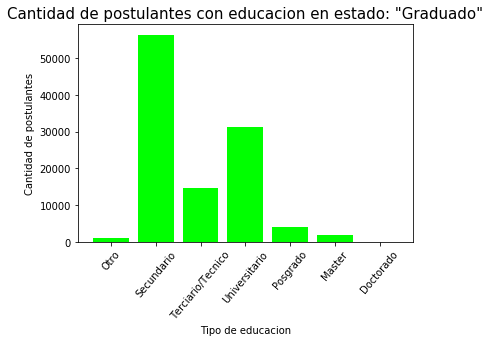

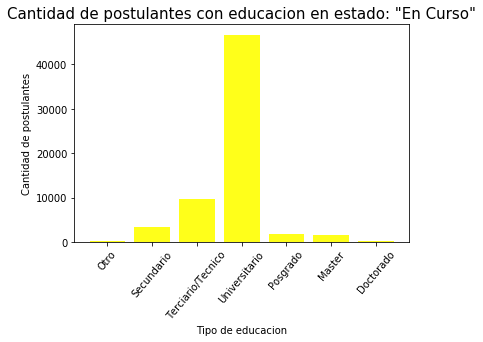

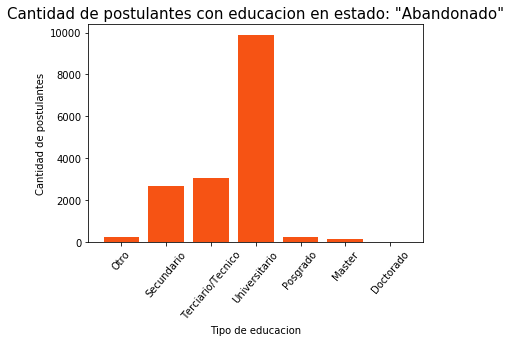

In [45]:
def get_color(unEstado):
    if estado == 'Abandonado': return '#f65314'
    if estado == 'En Curso': return '#ffff1a'
    if estado == 'Graduado': return '#00ff00'

width = 0.35
for estado in estados:
    postulantes_estado = []
    fig, ax = plt.subplots()
    for nombre in nombres:
        postulantes_estado.append(postulantes_nombre[estado][nombre])
    ax.bar(np.arange(len(nombres)), postulantes_estado, color = get_color(estado))
    ax.set_xticks(np.arange(len(nombres)))
    ax.set_xticklabels(nombres,rotation=50)
    ax.set_ylabel('Cantidad de postulantes')
    ax.set_xlabel('Tipo de educacion')
    ax.set_title('Cantidad de postulantes con educacion en estado: "' + estado + '"', size = 15)
    

Vemos que las distribuciones de los estados "En Curso" y "Abandonado" son muy similares, con un gran pico en Universitario (Tambien por la cantidad de casos). Sin embargo, la distribucion de "Graduado" tiene su pico en Secundario.

Para terminar con los estados, hacemos un gráfico con un resumen de todo esto

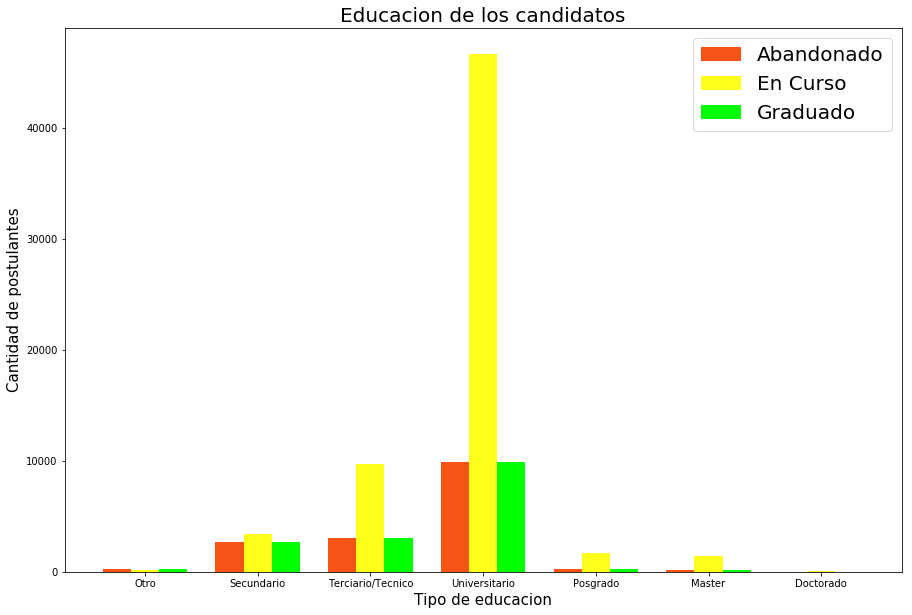

In [55]:
fig, ax = plt.subplots(figsize = (15,10))
width = 0.25

postulantes_abandonado = []
postulantes_encurso = []
postulantes_graduado = []
for nombre in nombres:
    
    postulantes_abandonado.append(postulantes_nombre['Abandonado'][nombre])
    #encurso
    postulantes_encurso.append(postulantes_nombre['En Curso'][nombre])
    #graduado
    postulantes_graduado.append(postulantes_nombre['Graduado'][nombre])

abandonado = ax.bar(np.arange(len(nombres))-width, postulantes_abandonado, width, color = '#f65314')
encurso = ax.bar(np.arange(len(nombres)), postulantes_encurso, width, color = '#ffff1a')
graduado = ax.bar(np.arange(len(nombres))+width, postulantes_abandonado, width, color = '#00ff00')

ax.set_xticks(np.arange(len(nombres)))
ax.set_xticklabels(nombres,rotation=0)

ax.legend((abandonado[0], encurso[0], graduado[0]), ('Abandonado', 'En Curso', 'Graduado'), prop={'size': 20})
ax.set_ylabel('Cantidad de postulantes', size = 15)
ax.set_xlabel('Tipo de educacion', size = 15)
ax.set_title('Educacion de los candidatos', size = 20)

## Analizamos el set de datos: "postulantes_genero_y_edad"

In [2]:
postulantes_genero_edad = pd.read_csv("/home/luupesado/7506_Datos/2018/datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv")

Vemos que forma tienen los datos

In [3]:
postulantes_genero_edad.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


Pedimos un poco más información acerca de los datos que tenmos

In [4]:
postulantes_genero_edad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200888 entries, 0 to 200887
Data columns (total 3 columns):
idpostulante       200888 non-null object
fechanacimiento    196138 non-null object
sexo               200888 non-null object
dtypes: object(3)
memory usage: 4.6+ MB


Vemos que nos faltan algunos datos de la fecha de nacimiento de los postulantes, por ahora vamos a ver el sexo y nos los vamos a quedar

In [6]:
postulantes_genero_edad['sexo'].value_counts()

FEM           101981
MASC           94339
NO_DECLARA      4568
Name: sexo, dtype: int64

Vamos a hacer un gráfico  que nos muestre mejor las cantidades

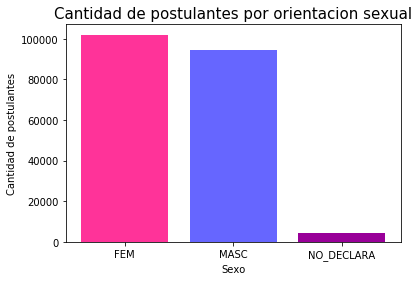

In [9]:
fig, ax = plt.subplots()
ax.bar(np.arange(3), postulantes_genero_edad['sexo'].value_counts(), color = ['#ff3399', '#6666ff','#990099'])
ax.set_ylabel('Cantidad de postulantes')
ax.set_xlabel('Sexo')
ax.set_xticks(np.arange(3))
ax.set_xticklabels( postulantes_genero_edad['sexo'].value_counts().index, rotation=0)
ax.set_title('Cantidad de postulantes por orientacion sexual', size = 15)

Ahora quitamos a los postulantes que no declaran el genero y la edad y hacemos un piechart con el porcentaje de hombres y mujeres

In [10]:
femenino=postulantes_genero_edad[postulantes_genero_edad["sexo"]=="FEM"]
masculino=postulantes_genero_edad[postulantes_genero_edad["sexo"]=="MASC"]

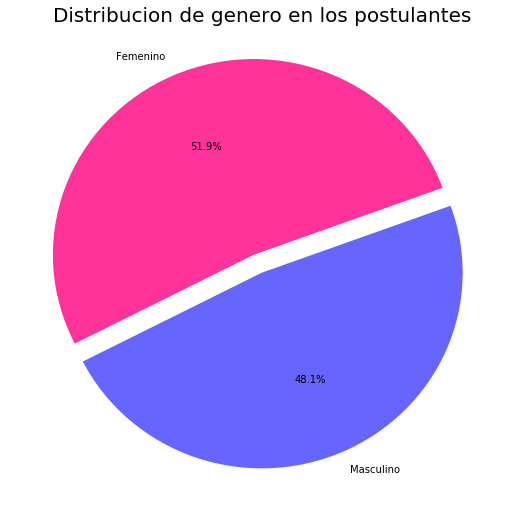

In [11]:
sizes = [femenino.sexo.count(), masculino.sexo.count()]
nombres = ['Femenino', 'Masculino']

plt.figure(figsize=(9, 9))
plt.title('Distribucion de genero en los postulantes', fontsize=20)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['#ff3399', '#6666ff'], explode=(0.1, 0))
plt.show()

Hay un porcentaje de hombres levemente menor, pero se acerca a la mitad

In [2]:
postulantes = sc.textFile('/home/luupesado/7506_Datos/2018/datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv', 10)

In [3]:
import datetime as dt

In [4]:
def strdate_to_age(string):
    try:
        date = dt.datetime.strptime(string, "%Y-%m-%d")
        today = dt.datetime(2018, 4, 1)
        edad = today.year - date.year
        if today.month >= date.month and today.day >= date.day:
            edad = edad +1
        return edad
    except:
        return 0

Spark nos permite hacer muchas cosas en una sola linea. Comenzamos quitando la columna de header, luego convertimos la fecha de naciemiento a edad con la funcion que creamos arriba, y terminamos quitando a los postulantes menosres de 17 años y a los mayores de 100

In [10]:
postulantes_edad = postulantes.map(lambda x: x.split(',')) \
                            .filter(lambda x: x[0] != 'idpostulante')\
                            .map(lambda y: (strdate_to_age(y[1]), 1)) \
                            .filter(lambda z: (z[0] <100 and z[0]>16))

Vemos que nos queda un dato con la edad de cada postulante y un 1 (estos unos los vamos a usar para sumar y así contar la cantidad de personas con cada edad)

In [11]:
postulantes_edad.take(5)

[(48, 1), (56, 1), (40, 1), (49, 1), (37, 1)]

In [12]:
postulantes_edad = postulantes_edad.reduceByKey(lambda a, b: a+b)

In [13]:
postulantes_edad = postulantes_edad.takeOrdered(61, lambda a: a[0])

Vemos que nos quedó una lista de tuplas con las edades y la cantidad de postulantes de cada edad

In [15]:
postulantes_edad

[(18, 566),
 (19, 3625),
 (20, 6449),
 (21, 8503),
 (22, 9927),
 (23, 10874),
 (24, 11586),
 (25, 11680),
 (26, 11804),
 (27, 11923),
 (28, 11099),
 (29, 9890),
 (30, 9179),
 (31, 8309),
 (32, 7643),
 (33, 6679),
 (34, 5879),
 (35, 5450),
 (36, 5024),
 (37, 4661),
 (38, 4189),
 (39, 3883),
 (40, 3384),
 (41, 2933),
 (42, 2641),
 (43, 2356),
 (44, 1979),
 (45, 1692),
 (46, 1564),
 (47, 1462),
 (48, 1277),
 (49, 1098),
 (50, 944),
 (51, 874),
 (52, 751),
 (53, 662),
 (54, 646),
 (55, 552),
 (56, 478),
 (57, 447),
 (58, 376),
 (59, 286),
 (60, 233),
 (61, 182),
 (62, 163),
 (63, 96),
 (64, 73),
 (65, 37),
 (66, 30),
 (67, 19),
 (68, 30),
 (69, 12),
 (70, 9),
 (71, 7),
 (72, 2),
 (74, 3),
 (75, 2),
 (76, 3),
 (77, 1),
 (79, 1),
 (97, 1)]

Vamos a graficar esto para ver la distribucion de edades de los pustulantes

In [17]:
edades = []
count = []
edad = 18
i = 0
while edad <= postulantes_edad[-1][0]:
    edades.append(edad)
    if postulantes_edad[i][0] == (edad):
        count.append(postulantes_edad[i][1])
        i = i+1
        edad = edad + 1
    else:
        count.append(0)
        edad = edad + 1

<Container object of 80 artists>

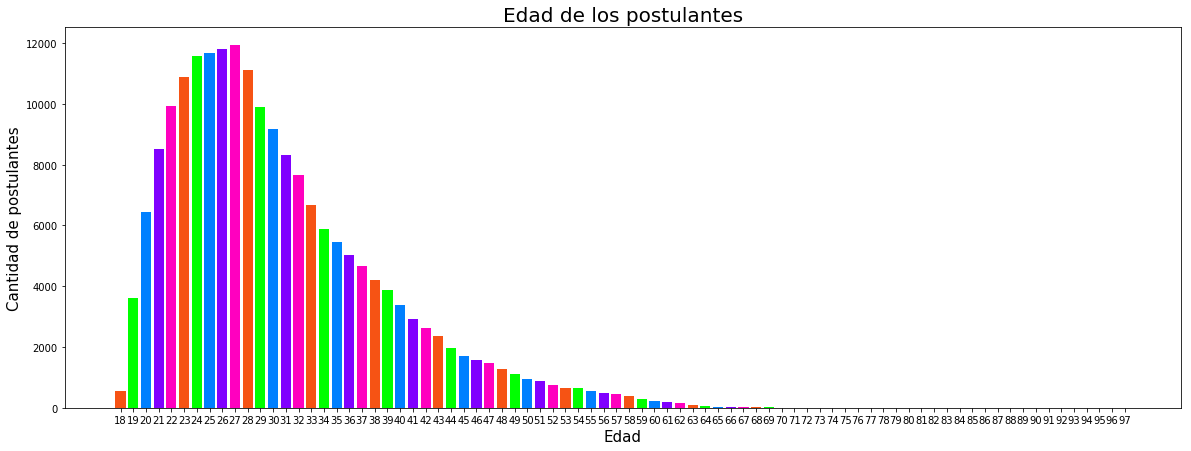

In [20]:
fig, ax = plt.subplots(figsize = (20,7))
width = 0.35
ax.set_xticks(np.arange(len(edades)) + width)
ax.set_xticklabels(edades)
ax.set_title('Edad de los postulantes', size = 20)
ax.set_xlabel('Edad', size = 15)
ax.set_ylabel('Cantidad de postulantes', size = 15)
ax.bar(np.arange(len(edades))+width, count, color = ['#f65314', '#00ff00', '#0080ff', '#8000ff', '#ff00bf'])

Vemos una especie de campana en la distribucion, con un lindo máximo en los 27. ESto de que se vean bastantes postulantes jóvenes, encaja con el hecho de que el nivel de estudios de la mayoría de los postulantes sea o secundario graduado, o universitario en curso.

## Analizamos el set de datos: "vistas"

In [2]:
vistas = pd.read_csv('/home/luupesado/7506_Datos/2018/datos_navent_fiuba/fiuba_3_vistas.csv')

Vemos como está formado el dataset

In [3]:
vistas.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


Mas en detalle...

In [4]:
vistas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961897 entries, 0 to 961896
Data columns (total 3 columns):
idAviso         961897 non-null int64
timestamp       961897 non-null object
idpostulante    961897 non-null object
dtypes: int64(1), object(2)
memory usage: 22.0+ MB


Decidimos separar el timestamp en dos columnas, una con la fecha y otra con el horario

In [5]:
def separar_fecha(fecha):
    nueva_fecha=fecha.split("T")
    return nueva_fecha[0]
def separar_horario(fecha):
    nueva_fecha=fecha.split("T")
    dato=nueva_fecha[1]
    nuevo_horario=dato.split("-")
    return nuevo_horario[0]

In [6]:
vistas["nueva_fecha"]=vistas["timestamp"].map(separar_fecha)
vistas["nuevo_horario"]=vistas["timestamp"].map(separar_horario)

Nos queda así:

In [7]:
vistas.head()

,idAviso,timestamp,idpostulante,nueva_fecha,nuevo_horario
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z,2018-02-23,13:38:13.187
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR,2018-02-23,13:38:14.296
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd,2018-02-23,13:38:14.329
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv,2018-02-23,13:38:17.921
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP,2018-02-23,13:38:18.973


Ahora lo convertimos a fechas y horarios de tipo datetime

In [8]:
vistas["nueva_fecha"]=pd.to_datetime(vistas["nueva_fecha"])
vistas["nuevo_horario"]=pd.to_datetime(vistas["nuevo_horario"])

In [9]:
import calendar 
def dia_de_semana(fecha):
    return calendar.day_name[fecha.weekday()]

Vamos a ver que días de la semana hay más vistas a los anuncios

In [10]:
vistas["dia"]=vistas["nueva_fecha"].map(dia_de_semana)

In [11]:
vistas["dia"].value_counts()

Monday       240783
Tuesday      230947
Wednesday    226826
Sunday       105245
Saturday      90349
Friday        67747
Name: dia, dtype: int64

Nos llama la atencion que no haya ningun dato de vistas para el día jueves, sospchamos que tal vez hay información de menos de una semana. 

In [12]:
vistas["nueva_fecha"].value_counts()

2018-02-26    240783
2018-02-27    230947
2018-02-28    226826
2018-02-25    105245
2018-02-24     90349
2018-02-23     67747
Name: nueva_fecha, dtype: int64

Corroboramos que tenemos informacion unicamente del 23/2 al 26/2

In [13]:
vistas["dia"] = vistas["dia"].astype('category')

Ordenamos los días así, porque tenesmo datos de menos de una semana y los vamos a poner en orden de fecha

In [14]:
categories_order = ['Friday','Saturday','Sunday','Monday', 'Tuesday', 'Wednesday']

In [15]:
vistas["dia"] = vistas["dia"].cat \
                             .set_categories(categories_order, ordered = True)

In [16]:
vistas = vistas.sort_values('dia')

In [17]:
vistas_group = vistas.groupby('dia')['idpostulante'].count()

In [18]:
vistas_group

dia
Friday        67747
Saturday      90349
Sunday       105245
Monday       240783
Tuesday      230947
Wednesday    226826
Name: idpostulante, dtype: int64

In [19]:
y = [vistas_group.Friday,vistas_group.Saturday, vistas_group.Sunday, vistas_group.Monday, vistas_group.Tuesday, vistas_group.Wednesday]

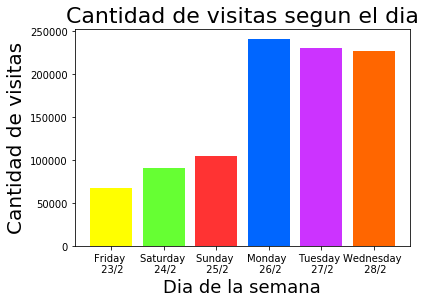

In [20]:
fig, ax = plt.subplots()
ax.set_xticks(np.arange(7))
ax.set_xticklabels(['Friday \n 23/2', 'Saturday \n 24/2', 'Sunday \n 25/2', 'Monday \n 26/2','Tuesday \n 27/2', 'Wednesday \n 28/2'],rotation='horizontal')

ax.bar(np.arange(6), y ,color= ['#ffff00', '#66ff33', '#ff3333', '#0066ff', '#cc33ff', '#ff6600']);
plt.title('Cantidad de visitas segun el dia', fontsize=22);
plt.xlabel('Dia de la semana', fontsize=18);
plt.ylabel('Cantidad de visitas', fontsize=20)

Los últimos 3 días, días de semana, hubo muchas más visitas que los demás días

Hacemos un conteo por hora

In [21]:
vistas["hora"]=vistas["nuevo_horario"].dt.hour

In [22]:
semana=vistas.loc[:,["hora","dia"]]

In [23]:
semana["cantidad"]=semana["hora"].map(lambda x:1)
semana_contador=semana.groupby("hora").aggregate(sum)

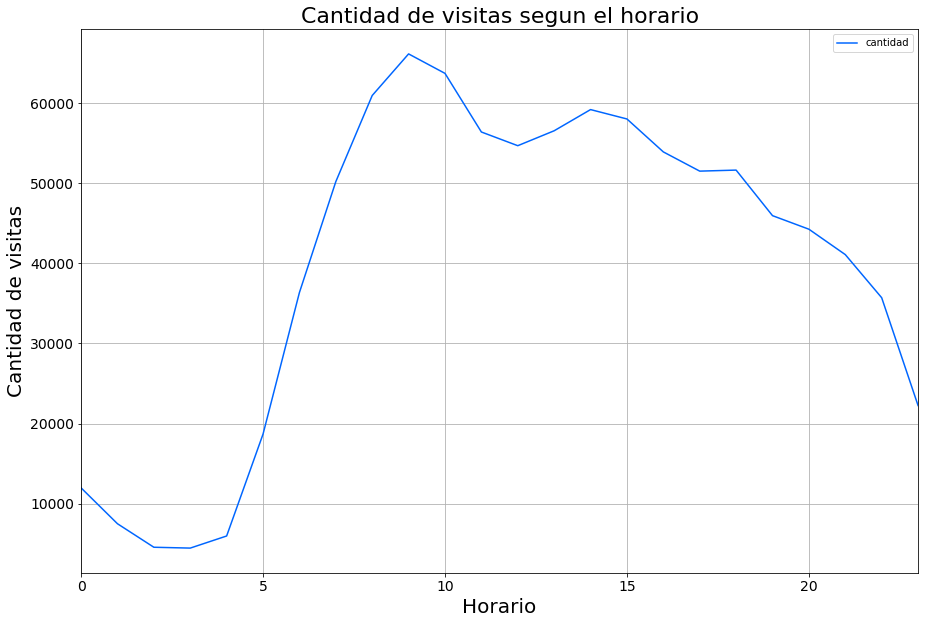

In [24]:
semana_contador.plot(rot=0,figsize=(15,10),color="#0066ff",fontsize=14,grid=True);
plt.title('Cantidad de visitas segun el horario', fontsize=22);
plt.xlabel('Horario', fontsize=20);
plt.ylabel('Cantidad de visitas', fontsize=20);

Vemos que, logicamente hay mayor cantidad de visitas a la mañana temprano, bajan durante el mediodía, suben nuevamente a la tarde y hay muy poscas durante la madrugada.

## Analizamos el dataset: "postulaciones"

In [21]:
postulaciones = pd.read_csv('/home/luupesado/7506_Datos/2018/datos_navent_fiuba/fiuba_4_postulaciones.csv')

Vemos como están compuestas las filas

In [34]:
postulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


Mas en detalle...

In [35]:
postulaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401623 entries, 0 to 3401622
Data columns (total 3 columns):
idaviso             int64
idpostulante        object
fechapostulacion    object
dtypes: int64(1), object(2)
memory usage: 77.9+ MB


Vamos a convertir la fecha en formato fecha y agregar columnas con el día de la semana, el núemero de día y el núemero de mes

In [36]:
postulaciones['fechapostulacion'] = pd.to_datetime(postulaciones['fechapostulacion'])
postulaciones['dia'] = postulaciones['fechapostulacion'].dt.weekday_name
postulaciones['mes'] = postulaciones['fechapostulacion'].dt.month
postulaciones['numero_dia'] = postulaciones['fechapostulacion'].dt.day

In [37]:
enero = postulaciones[postulaciones['mes']==1]
febrero = postulaciones[postulaciones['mes']==2]

In [38]:
print enero['numero_dia'].value_counts().index
print febrero['numero_dia'].value_counts().index

Int64Index([24, 30, 29, 22, 23, 15, 31, 17, 16, 18, 25, 26, 19, 27, 28, 21,
            20],
           dtype='int64')
Int64Index([19, 20, 21, 26, 27, 28, 22, 15,  5,  6, 14, 23, 16,  1,  7,  2,  8,
             9, 25, 13, 24, 18, 17,  4, 12,  3, 10, 11],
           dtype='int64')


Vemos que los datos de enero son de la última quincena, por lo que vamos a separar los datos de febrero, tambien por quincena

In [39]:
febrero_1quincena = febrero[febrero['numero_dia']<15]
febrero_2quincena = febrero[febrero['numero_dia']>=15]

In [40]:
postulaciones_group = postulaciones.groupby('dia')['idaviso'].count()

In [41]:
x = ['Monday', 'Tuesday','Wednesday', 'Thursday',  'Friday', 'Saturday', 'Sunday']
y = [postulaciones_group.Monday,postulaciones_group.Tuesday,postulaciones_group.Wednesday,postulaciones_group.Thursday, postulaciones_group.Friday,postulaciones_group.Saturday,postulaciones_group.Sunday]

In [42]:
enero = enero.groupby(['mes','dia'])['idpostulante'].count()
febrero_1quincena = febrero_1quincena.groupby(['mes','dia'])['idpostulante'].count()
febrero_2quincena = febrero_2quincena.groupby(['mes','dia'])['idpostulante'].count()

In [43]:
jan_y = [enero[1].Monday, enero[1].Tuesday, enero[1].Wednesday, enero[1].Thursday, enero[1].Friday,enero[1].Saturday,enero[1].Sunday]
feb1_y = [febrero_1quincena[2].Monday, febrero_1quincena[2].Tuesday, febrero_1quincena[2].Wednesday, febrero_1quincena[2].Thursday, febrero_1quincena[2].Friday,febrero_1quincena[2].Saturday,febrero_1quincena[2].Sunday]
feb2_y = [febrero_2quincena[2].Monday, febrero_2quincena[2].Tuesday, febrero_2quincena[2].Wednesday, febrero_2quincena[2].Thursday, febrero_2quincena[2].Friday,febrero_2quincena[2].Saturday,febrero_2quincena[2].Sunday]

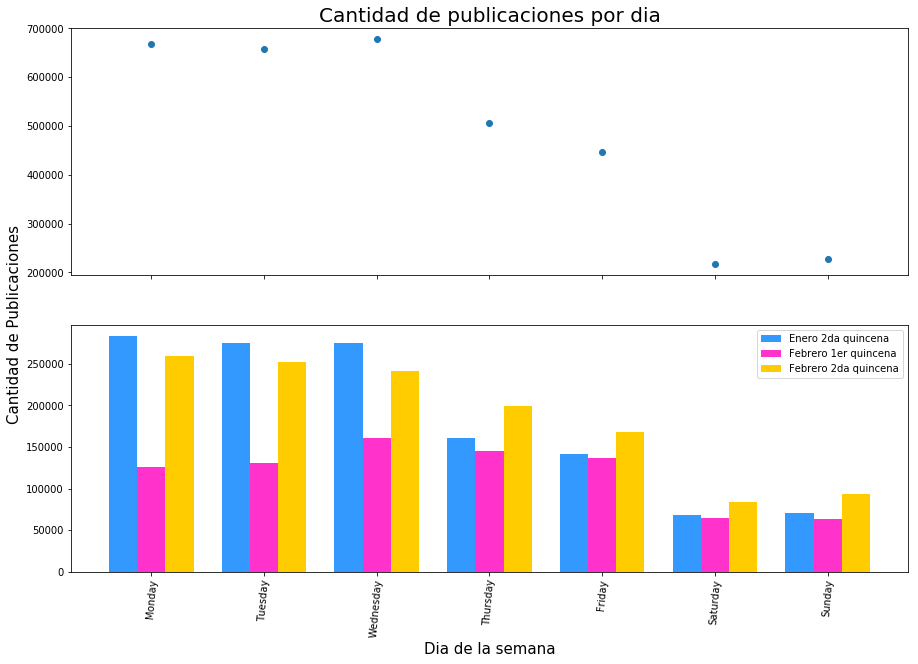

In [49]:
fig, (ax1, ax2)=plt.subplots(2,1,sharex = True, figsize=(15,10))
ax1.scatter(np.arange(7), y)
ax1.set_xticks(np.arange(7))
ax1.set_xticklabels(x,rotation='horizontal')
ax2.set_xlabel('Dia de la semana', size =15)
ax2.set_ylabel('Cantidad de Publicaciones', x=1,y=1, size = 15)

width = 0.25
jan = ax2.bar(np.arange(len(jan_y))-width, jan_y, width, color = '#3399ff')
feb1 = ax2.bar(np.arange(len(feb1_y)), feb1_y, width, color = '#ff33cc')
feb2 = ax2.bar(np.arange(len(feb2_y))+width, feb2_y, width, color = '#ffcc00')
ax2.set_xticks(np.arange(7))
ax2.set_xticklabels(x,rotation=85)

ax2.legend((jan[0], feb1[0], feb2[0]), ('Enero 2da quincena', 'Febrero 1er quincena', 'Febrero 2da quincena'))

ax1.set_title('Cantidad de publicaciones por dia', size = 20)

Vemos que se mantiene la tendencia que habíamos apensas sospechado con los pocos datos de las vistas: que durante el fin de semana las postulaciones tambien bajan, y son mayores los primeros días de la semana. Nos llama la atencion las pocas postulaciones durante la primer quincena de febrero, en general

## Analizamos el dataset: "avisos_online"

In [5]:
avisos_online = pd.read_csv('/home/luupesado/7506_Datos/2018/datos_navent_fiuba/fiuba_5_avisos_online.csv')

Vamos a ver que tiene

In [6]:
avisos_online.head()

,idaviso
0,1112355872
1,1112335374
2,1112374842
3,1111984070
4,1111822480


In [7]:
avisos_online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5028 entries, 0 to 5027
Data columns (total 1 columns):
idaviso    5028 non-null int64
dtypes: int64(1)
memory usage: 39.4 KB


Este set de datos solo contiene los ids de los avisos que se encuentran online. Hay 5028 avisos online

Agregamos una columna para indicar que el aviso es online cuando luego lo unamos con avisos_detalles

In [3]:
avisos_online['online'] = True

## Analizamos el dataset: "avisos_detalle"

In [26]:
avisos_detalles = pd.read_csv('/home/luupesado/7506_Datos/2018/datos_navent_fiuba/fiuba_6_avisos_detalle.csv')

Miro las primeras filas para ver que tine

In [10]:
avisos_detalles.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


Nos concentramos en sus columnas

In [11]:
avisos_detalles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13534 entries, 0 to 13533
Data columns (total 11 columns):
idaviso                 13534 non-null int64
idpais                  13534 non-null int64
titulo                  13534 non-null object
descripcion             13534 non-null object
nombre_zona             13534 non-null object
ciudad                  47 non-null object
mapacalle               872 non-null object
tipo_de_trabajo         13534 non-null object
nivel_laboral           13534 non-null object
nombre_area             13534 non-null object
denominacion_empresa    13529 non-null object
dtypes: int64(2), object(9)
memory usage: 1.1+ MB


Vemos que las columnas 'ciudad' y 'nombre_zona' casi no tienen ocurrencias, por lo que no las vamos a usar. Además son muy pocas las filas a las que le falta denominación empresa, por lo que en un principio vaos a quitar estas filas tambien para tener los datos completos y hacer un mejor análisis inicial.

In [13]:
avisos_detalles = avisos_detalles.dropna(axis = 0, subset = ['denominacion_empresa'], how = 'any')

In [14]:
avisos_detalles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13529 entries, 0 to 13533
Data columns (total 11 columns):
idaviso                 13529 non-null int64
idpais                  13529 non-null int64
titulo                  13529 non-null object
descripcion             13529 non-null object
nombre_zona             13529 non-null object
ciudad                  47 non-null object
mapacalle               872 non-null object
tipo_de_trabajo         13529 non-null object
nivel_laboral           13529 non-null object
nombre_area             13529 non-null object
denominacion_empresa    13529 non-null object
dtypes: int64(2), object(9)
memory usage: 1.2+ MB


### Le damos un vistazo a cada columna
Así tendremos un mejor conocimiento del set de datos

In [15]:
avisos_detalles['idaviso'].value_counts().head()

1112381437    1
1112306395    1
1112226562    1
1111335681    1
1112320768    1
Name: idaviso, dtype: int64

Como era de esperar, los ids son todos diferentes, por lo que no hay repetidos

In [16]:
avisos_detalles['descripcion'].describe()

count                                                 13529
unique                                                12669
top       <p>Nos encontramos en la búsqueda de un ANALIS...
freq                                                     19
Name: descripcion, dtype: object

In [17]:
avisos_detalles['titulo'].describe()

count                                                 13529
unique                                                11645
top       Analistas de Testing Ssr/Sr con Automatización...
freq                                                     22
Name: titulo, dtype: object

Estas columnas son muy dispersas, ya que vemos que hay casi tantos valores únicos como filas. Sin embargo nos llama la atención que, sobre todo en la columna 'descripción' hay algunos cuantos valores iguales

## Columna: "tipo_de_trabajo"

In [18]:
avisos_detalles['tipo_de_trabajo'].describe()

count         13529
unique            9
top       Full-time
freq          12335
Name: tipo_de_trabajo, dtype: object

In [19]:
avisos_detalles['tipo_de_trabajo'].value_counts()

Full-time          12335
Part-time            862
Teletrabajo          110
Pasantia              63
Por Horas             63
Temporario            42
Por Contrato          37
Fines de Semana       14
Primer empleo          3
Name: tipo_de_trabajo, dtype: int64

Ya que hay pocos valores posibles para esta columna, la vamos a convertir el tipo de dato en categoría, así ahorramos memoria y nos facilita algunos plots y análisis posteriores

In [20]:
avisos_detalles['tipo_de_trabajo'] = avisos_detalles['tipo_de_trabajo'].astype('category')

También vamos a plasmar en un gráfico las apariciones de cada categoría

In [21]:
def autolabel(rects, mysize):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        width = rect.get_width()
        ax.text(1.05*width,rect.get_y() + rect.get_height()/2.,
                '%d' % int(width),
                ha='left', va='center',size = mysize)

In [22]:
values = avisos_detalles['tipo_de_trabajo'].value_counts().values

In [23]:
indexes = avisos_detalles['tipo_de_trabajo'].value_counts().index

In [24]:
indexes

CategoricalIndex([u'Full-time', u'Part-time', u'Teletrabajo', u'Por Horas',
                  u'Pasantia', u'Temporario', u'Por Contrato',
                  u'Fines de Semana', u'Primer empleo'],
                 categories=[u'Fines de Semana', u'Full-time', u'Part-time', u'Pasantia', u'Por Contrato', u'Por Horas', u'Primer empleo', u'Teletrabajo', ...], ordered=False, dtype='category')

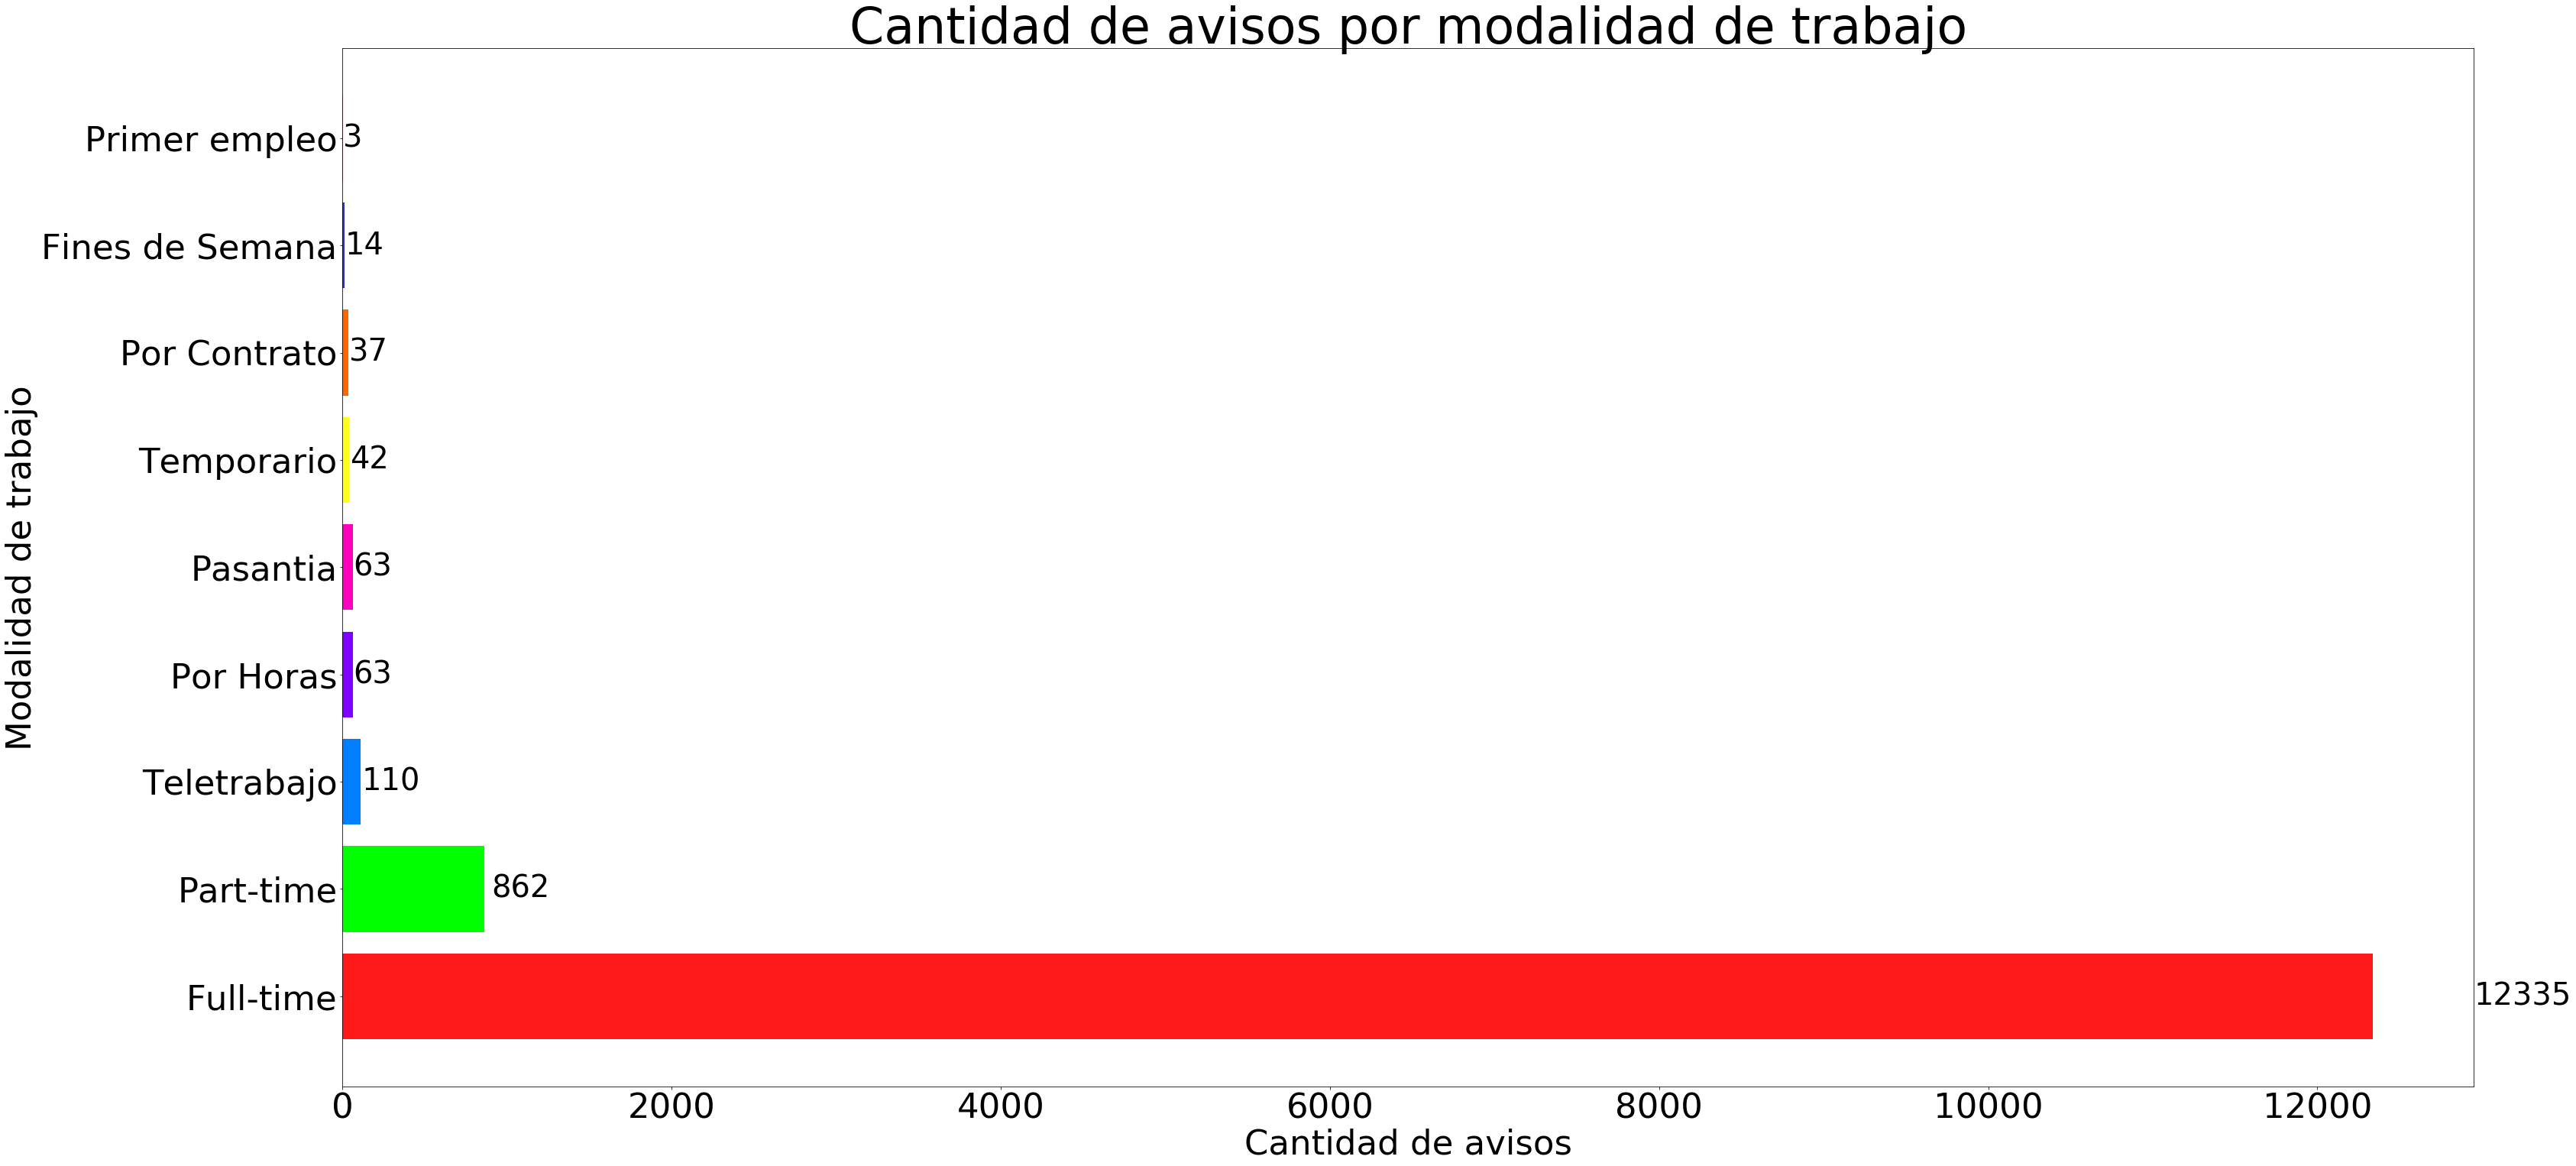

In [25]:
fig, ax = plt.subplots(figsize=(50,25))
autolabel(ax.barh(np.arange(9), values , color = ['#ff1a1a', '#00ff00', '#0080ff', '#8000ff', '#ff00bf','#ffff1a','#ff6600', '#3333cc', '#ff80aa' ]), 40)
ax.set_yticks(np.arange(9))
ax.set_yticklabels(indexes, size = 45)
ax.set_xticklabels([0, 2000,4000,6000,8000,10000,12000], size = 45)
ax.set_title('Cantidad de avisos por modalidad de trabajo', size = 65)
ax.set_xlabel('Cantidad de avisos', size = 45)
ax.set_ylabel('Modalidad de trabajo', size = 45)

Como hay un gran porcentaje de trabajos ful-time, no se llega a ver bien la distribucion. Vamos a excluir los full-time en una nueva vizualización.

In [26]:
values = avisos_detalles.loc[avisos_detalles['tipo_de_trabajo'] != 'Full-time']['tipo_de_trabajo'].value_counts().values

In [27]:
indexes = avisos_detalles.loc[avisos_detalles['tipo_de_trabajo'] != 'Full-time']['tipo_de_trabajo'].value_counts().index

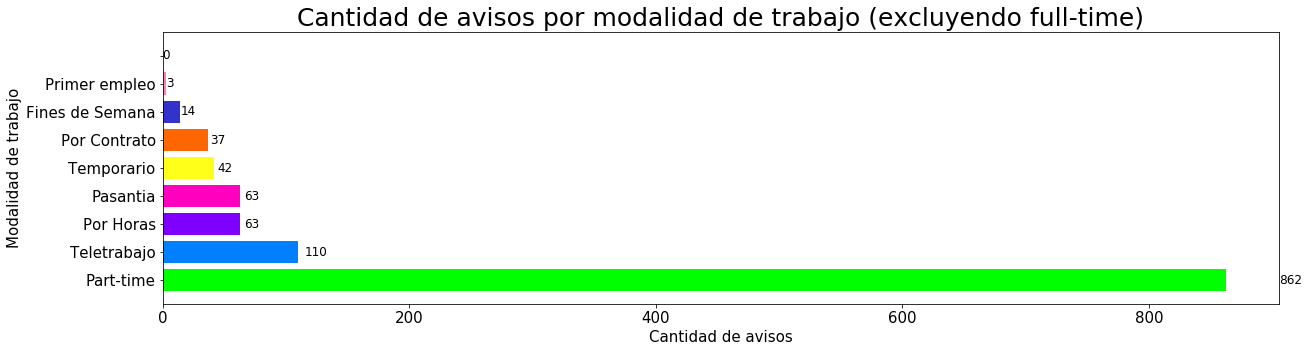

In [28]:
fig, ax = plt.subplots(figsize=(20,5))
autolabel(ax.barh(np.arange(9), values ,   color = ['#00ff00', '#0080ff', '#8000ff', '#ff00bf','#ffff1a','#ff6600', '#3333cc', '#ff80aa' ]),12)
ax.set_yticks(np.arange(9))
indexes = [ u'Part-time', u'Teletrabajo', u'Por Horas',
                  u'Pasantia', u'Temporario', u'Por Contrato',
                  u'Fines de Semana', u'Primer empleo']
ax.set_yticklabels(indexes, size = 15)
ax.set_xticklabels([0, 200,400,600,800], size = 15)
ax.set_title('Cantidad de avisos por modalidad de trabajo (excluyendo full-time)', size = 25)
ax.set_xlabel('Cantidad de avisos', size = 15)
ax.set_ylabel('Modalidad de trabajo', size = 15)

Los trabajos con modalidad full y part time, como era de esperar concentran a casi todos los avisos. Sin embargo nos resulta interesante que el tercer puesto se lo lleven los tele-trabajos.

## Columna: "nombre_zona"

In [29]:
avisos_detalles['nombre_zona'].describe()

count                 13529
unique                    4
top       Gran Buenos Aires
freq                  12649
Name: nombre_zona, dtype: object

In [30]:
avisos_detalles['nombre_zona'].value_counts()

Gran Buenos Aires              12649
Capital Federal                  876
GBA Oeste                          2
Buenos Aires (fuera de GBA)        2
Name: nombre_zona, dtype: int64

In [31]:
avisos_detalles['ciudad'].value_counts()

Buenos Aires                14
Argentina                   13
CABA                         3
Capital Federal              2
San Isidro                   2
Vicente Lopez                1
Mendoza                      1
Santa Rosa                   1
La Plata                     1
Tortuguitas                  1
Parque Patricios             1
Barracas                     1
Microcentro                  1
paternal                     1
República Argentina          1
Buenos Aires Province        1
caba                         1
Zárate, Campana, Escobar     1
Name: ciudad, dtype: int64

Casi todos los trabajos se concentran en Gran Buenos Aires y Capital Federal. Sin embargo tomamos estos datos "con pinzas" porque el "Gran Buenos Aires" incluye a la Capital federal, y a "GBA Oeste". Por ejemplo, tenemos ocurrencias que dicen "Gran Buenos Aires" en "nombre_zona" y "Capital Federal" en "ciudad", que por cierto es un campo que habíamos decidido descartar por la poca cantidad de datos. Por lo tanto no podemos saber tampoco si hay más avisos de GBA que sean particularmente de la CABA.

In [32]:
avisos_detalles[avisos_detalles['nombre_zona'] == 'Gran Buenos Aires'][avisos_detalles['ciudad'] == 'CABA'].count()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


idaviso                 2
idpais                  2
titulo                  2
descripcion             2
nombre_zona             2
ciudad                  2
mapacalle               0
tipo_de_trabajo         2
nivel_laboral           2
nombre_area             2
denominacion_empresa    2
dtype: int64

## Columna: "nivel_laboral"


In [33]:
avisos_detalles['nivel_laboral'].describe()

count                    13529
unique                       5
top       Senior / Semi-Senior
freq                      9404
Name: nivel_laboral, dtype: object

In [34]:
avisos_detalles['nivel_laboral'].value_counts()

Senior / Semi-Senior                    9404
Junior                                  2216
Otro                                     919
Jefe / Supervisor / Responsable          809
Gerencia / Alta Gerencia / Dirección     181
Name: nivel_laboral, dtype: int64

Ya que hay pocos valores posibles para esta columna, la vamos a convertir el tipo de dato en categoría, así ahorramos memoria y nos facilita algunos plots y análisis posteriores

In [35]:
avisos_detalles['nivel_laboral'] = avisos_detalles['nivel_laboral'].astype('category')

In [36]:
values = avisos_detalles['nivel_laboral'].value_counts().values
indexes = avisos_detalles['nivel_laboral'].value_counts().index

In [37]:
indexes = [u'Senior / Semi-Senior', u'Junior', u'Otro',
       u'Jefe / Supervisor / Responsable',
       u'Gerencia / Alta Gerencia / Direccion']

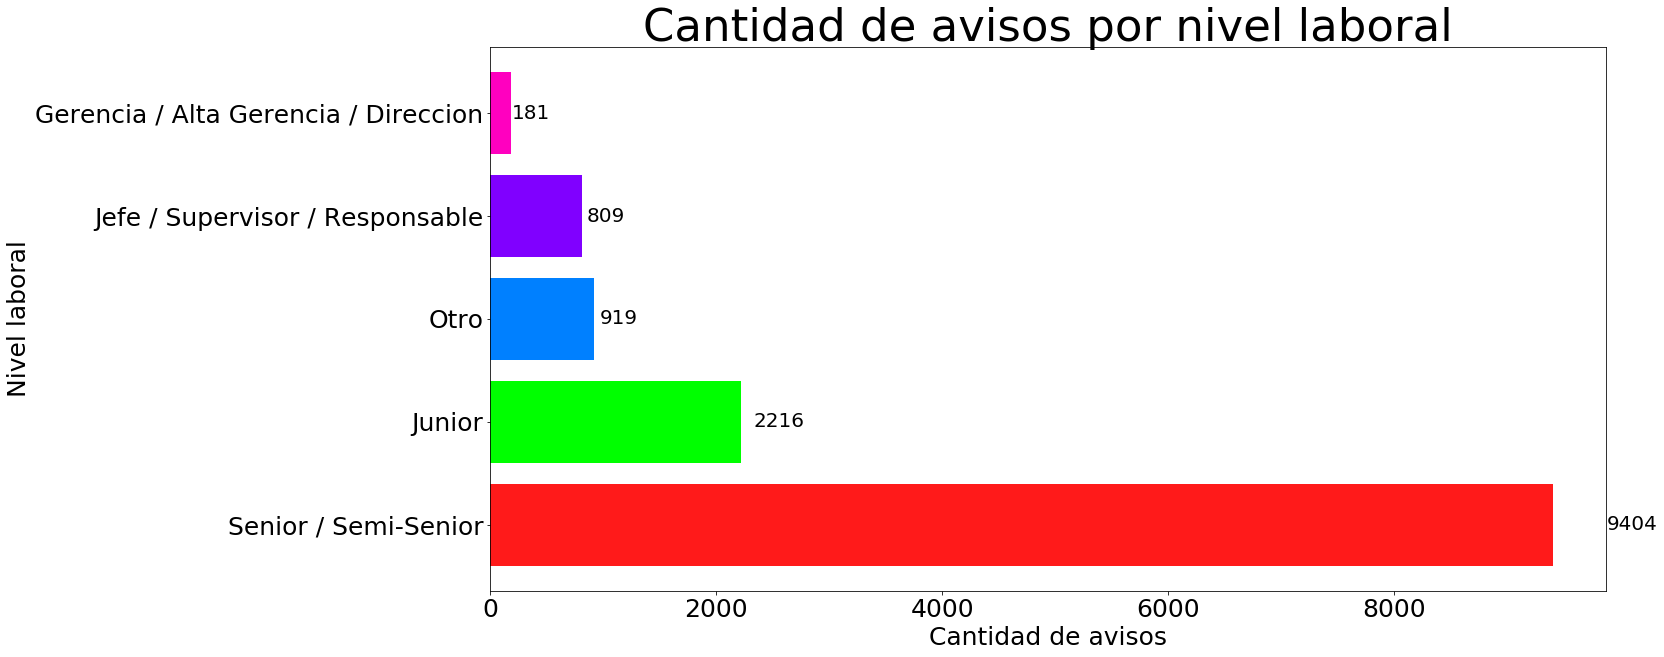

In [38]:
fig, ax = plt.subplots(figsize=(20,10))
autolabel(ax.barh(np.arange(len(values)), values , color = ['#ff1a1a', '#00ff00', '#0080ff', '#8000ff', '#ff00bf','#ffff1a']), 20)
ax.set_yticks(np.arange(len(values)))
ax.set_yticklabels(indexes, size = 25)
ax.set_xticklabels([0, 2000,4000,6000,8000], size = 25)
ax.set_title('Cantidad de avisos por nivel laboral', size = 45)
ax.set_xlabel('Cantidad de avisos', size = 25)
ax.set_ylabel('Nivel laboral', size = 25)

## Columna: "nombre_area"

In [39]:
avisos_detalles['nombre_area'].describe()

count      13529
unique       173
top       Ventas
freq        1656
Name: nombre_area, dtype: object

In [40]:
avisos_detalles['nombre_area'] = avisos_detalles['nombre_area'].astype('category')

In [41]:
avisos_detalles['nombre_area'].value_counts().head(15)

Ventas                   1656
Comercial                 982
Administración            901
Producción                820
Programación              576
Contabilidad              416
Tecnologia / Sistemas     388
Atención al Cliente       347
Mantenimiento             324
Recursos Humanos          235
Gastronomia               234
Oficios y Profesiones     209
Soporte Técnico           203
Logística                 200
Call Center               191
Name: nombre_area, dtype: int64

Si bien no hay tantas categorías, para graficar son demasiadas, por lo que vamos a graficar las 15 primeras

In [42]:
 values = avisos_detalles['nombre_area'].value_counts().head(15).values
indexes = avisos_detalles['nombre_area'].value_counts().head(15).index

In [43]:
indexes = [u'Ventas', u'Comercial', u'Administracion', u'Produccion',
       u'Programacion', u'Contabilidad', u'Tecnologia / Sistemas',
       u'Atencion al Cliente', u'Mantenimiento', u'Recursos Humanos',
       u'Gastronomia', u'Oficios y Profesiones', u'Soporte Tecnico',
       u'Logistica', u'Call Center']

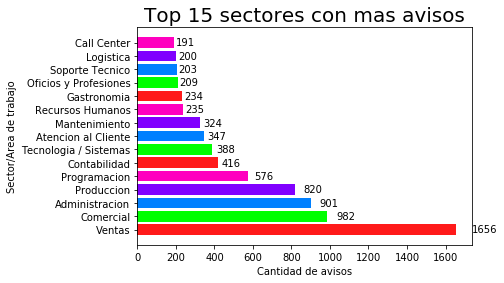

In [44]:
fig, ax = plt.subplots()#figsize=(20,10))
autolabel(ax.barh(np.arange(len(values)), values , color = ['#ff1a1a', '#00ff00', '#0080ff', '#8000ff', '#ff00bf']), 10)
ax.set_yticks(np.arange(len(values)))
ax.set_yticklabels(indexes)#, size = 25)
#ax.set_xticklabels([0, 2000,4000,6000,8000], size = 25)
ax.set_title('Top 15 sectores con mas avisos', size = 20)
ax.set_xlabel('Cantidad de avisos')#, size = 25)
ax.set_ylabel('Sector/Area de trabajo')#, size = 25)

## Columna: "denominacion_empresa"

In [45]:
avisos_detalles['denominacion_empresa'].describe()

count        13529
unique        2592
top       RANDSTAD
freq           562
Name: denominacion_empresa, dtype: object

Si bien tenemos muchos valores diferentes, nos enocontramos con un número no tan grande de empresas: 2592

In [46]:
avisos_detalles['denominacion_empresa'].value_counts()

RANDSTAD                                    562
Manpower                                    422
Grupo Gestión                               383
Assistem                                    289
SOLUTIX S.A.                                260
BAYTON                                      238
Pullmen Servicios Empresarios S.A.          229
Adecco - Región NORTE & OESTE GBA           205
Suministra                                  203
Adecco -Región Office                       200
Consultores de Empresas SRL                 197
Adecco -Región GBA SUR                      160
Complement Group (holding)                  160
Kaizen Recursos Humanos                     110
Adecco  -Región Litoral                     109
CrossOver                                   109
IT Resources                                109
Excelencia Laboral S.A.                      98
Swiss Medical Group                          88
Suple                                        88
Aliantec                                

In [47]:
 values = avisos_detalles['denominacion_empresa'].value_counts().head(15).values
indexes = avisos_detalles['denominacion_empresa'].value_counts().head(15).index

In [48]:
indexes = [u'RANDSTAD', u'Manpower', u'Grupo Gestion', u'Assistem',
       u'SOLUTIX S.A. ', u'BAYTON', u'Pullmen Servicios Empresarios S.A.',
       u'Adecco - Region NORTE & OESTE GBA', u'Suministra',
       u'Adecco -Region Office', u'Consultores de Empresas SRL',
       u'Adecco -Region GBA SUR', u'Complement Group (holding)',
       u'Kaizen Recursos Humanos', u'Adecco  -Región Litoral']

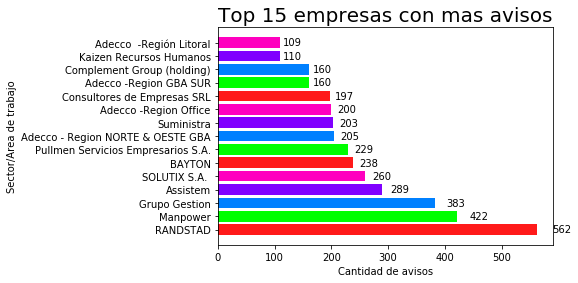

In [49]:
fig, ax = plt.subplots()#figsize=(20,10))
autolabel(ax.barh(np.arange(len(values)), values , color = ['#ff1a1a', '#00ff00', '#0080ff', '#8000ff', '#ff00bf']), 10)
ax.set_yticks(np.arange(len(values)))
ax.set_yticklabels(indexes)#, size = 25)
#ax.set_xticklabels([0, 2000,4000,6000,8000], size = 25)
ax.set_title('Top 15 empresas con mas avisos', size = 20)
ax.set_xlabel('Cantidad de avisos')#, size = 25)
ax.set_ylabel('Sector/Area de trabajo')#, size = 25)

Vemos que todas las empresas que aparecen en los primeros puestos, son consultoras, lo cual tiene mucho sentido.

## Relación entre columnas
Nos quedamos con las columnas que tienen datos, ya que en un principio vamos a analizar la relación entre las columnas claves.

In [50]:
import unicodedata
def elimina_tildes(s):
   return ''.join((c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn'))

def eliminar_tildes(keys):
    klist = []
    for k in keys:
        klist.append(elimina_tildes(k.decode('utf-8')))
    
    return klist 

In [51]:
index = avisos_detalles['tipo_de_trabajo'].value_counts().index
avisos_detalles['tipo_de_trabajo'] = avisos_detalles['tipo_de_trabajo'].cat\
                                    .set_categories(eliminar_tildes(index))
avisos_detalles['tipo_de_trabajo'].value_counts().index

CategoricalIndex([u'Full-time', u'Part-time', u'Teletrabajo', u'Pasantia',
                  u'Por Horas', u'Temporario', u'Por Contrato',
                  u'Fines de Semana', u'Primer empleo'],
                 categories=[u'Full-time', u'Part-time', u'Teletrabajo', u'Por Horas', u'Pasantia', u'Temporario', u'Por Contrato', u'Fines de Semana', ...], ordered=False, dtype='category')

In [52]:
index = avisos_detalles['nivel_laboral'].value_counts().index
avisos_detalles['nivel_laboral'] = avisos_detalles['nivel_laboral'].cat\
                                    .set_categories(eliminar_tildes(index))
avisos_detalles['nivel_laboral'].value_counts().index

CategoricalIndex([u'Senior / Semi-Senior', u'Junior', u'Otro',
                  u'Jefe / Supervisor / Responsable',
                  u'Gerencia / Alta Gerencia / Direccion'],
                 categories=[u'Senior / Semi-Senior', u'Junior', u'Otro', u'Jefe / Supervisor / Responsable', u'Gerencia / Alta Gerencia / Direccion'], ordered=False, dtype='category')

In [53]:
pd.crosstab(index=avisos_detalles['tipo_de_trabajo'],
            columns=[avisos_detalles['nivel_laboral']], margins=True)

nivel_laboral,Senior / Semi-Senior,Junior,Otro,Jefe / Supervisor / Responsable,All
tipo_de_trabajo,,,,,
Full-time,8885,1777,749,745,12156
Part-time,372,350,132,7,861
Teletrabajo,57,1,1,50,109
Por Horas,39,8,15,1,63
Pasantia,4,49,10,0,63
Temporario,20,18,3,1,42
Por Contrato,17,10,5,5,37
Fines de Semana,10,1,3,0,14
Primer empleo,0,2,1,0,3


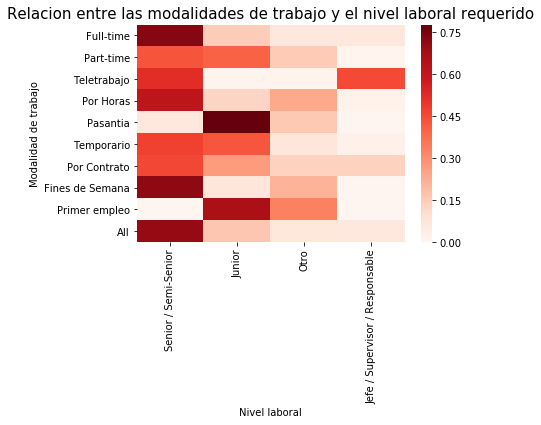

In [54]:
import seaborn as sns
ax = plt.axes()
sns.heatmap(pd.crosstab(index=avisos_detalles['tipo_de_trabajo'],
                        columns=[avisos_detalles['nivel_laboral']], margins=True, normalize= 'index'), cmap = 'Reds')
ax.set_title('Relacion entre las modalidades de trabajo y el nivel laboral requerido', size = 15)
ax.set_xlabel('Nivel laboral')
ax.set_ylabel('Modalidad de trabajo')

Cuanto más oscuro es el color en nuestro heatmap, más alta es la relacion que tienen entre sí. Observamos una gran correlación entre los puestos Senior y la modalidad full-time. Así como entre los puestos juniors y la spasantías y primeros empreos. 
Los Jefes y supervisores, si bien en la tabla se ve que casi siempre van de modalidad full-time, ocupan casi la mitad de los cargos con modalidad teletrabajo, lo cual nos llama un poco la atención.

In [56]:
index = avisos_detalles['nombre_area'].value_counts().head(15).index
avisos_detalles['nombre_area'] = avisos_detalles['nombre_area'].cat\
                                    .set_categories(eliminar_tildes(index))
avisos_detalles['nombre_area'].value_counts().index

CategoricalIndex([u'Ventas', u'Comercial', u'Contabilidad',
                  u'Tecnologia / Sistemas', u'Mantenimiento',
                  u'Recursos Humanos', u'Gastronomia',
                  u'Oficios y Profesiones', u'Call Center', u'Logistica',
                  u'Soporte Tecnico', u'Atencion al Cliente', u'Programacion',
                  u'Produccion', u'Administracion'],
                 categories=[u'Ventas', u'Comercial', u'Administracion', u'Produccion', u'Programacion', u'Contabilidad', u'Tecnologia / Sistemas', u'Atencion al Cliente', ...], ordered=False, dtype='category')

In [57]:
pd.crosstab(index=avisos_detalles['tipo_de_trabajo'],
            columns=[avisos_detalles['nombre_area']], margins=True)

nombre_area,Ventas,Comercial,Contabilidad,Tecnologia / Sistemas,Mantenimiento,Recursos Humanos,Gastronomia,Oficios y Profesiones,Call Center,All
tipo_de_trabajo,,,,,,,,,,
Full-time,1384,926,397,346,323,223,219,198,66,4082
Part-time,242,41,14,6,0,7,12,10,125,457
Teletrabajo,15,8,0,34,0,0,0,0,0,57
Por Horas,5,1,0,0,1,1,1,0,0,9
Pasantia,1,4,0,0,0,3,0,0,0,8
Temporario,3,2,4,1,0,0,1,0,0,11
Por Contrato,4,0,1,1,0,1,0,1,0,8
Fines de Semana,2,0,0,0,0,0,1,0,0,3
Primer empleo,0,0,0,0,0,0,0,0,0,0


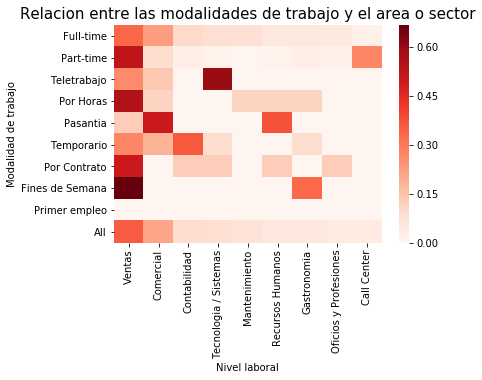

In [58]:
ax = plt.axes()
sns.heatmap(pd.crosstab(index=avisos_detalles['tipo_de_trabajo'],
            columns=[avisos_detalles['nombre_area']], margins=True, normalize= 'index'), cmap = 'Reds')
ax.set_title('Relacion entre las modalidades de trabajo y el area o sector', size = 15)
ax.set_xlabel('Nivel laboral')
ax.set_ylabel('Modalidad de trabajo')

Resaltan las relaciones entre los empleos part-time y los call-centers; el teletrabajo y el area de sistemas;
las pasantías en las areas comercial y recursos humanos; empleos temporarios en el area de ventas, comercial y de contabilidad; y los trabajos de fin de semana en el area de ventas y en el sector gastronómico.

Cremos que este análisis de la relacion entre columnas nos puede servir para el proximo tp de predicción

# Análisis profundo

Habiendo analizado cada set de datos por separado, nos planteamos preguntas que relacionan mas de un set de datos

# ¿Cuántos de los avisos de los que tenemos información se encuentran activos?

In [2]:
avisos_online = pd.read_csv('/home/luupesado/7506_Datos/2018/datos_navent_fiuba/fiuba_5_avisos_online.csv')
avisos_detalles = pd.read_csv('/home/luupesado/7506_Datos/2018/datos_navent_fiuba/fiuba_6_avisos_detalle.csv')

Unimos los sets de datos de avisos online y avisos detalles. Por lo que agregamos así una columna: "online" en la que se indica si el aviso está online

In [5]:
avisos = avisos_detalles.join(avisos_online.set_index('idaviso'),on='idaviso',how='left')

In [6]:
avisos.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,online
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR,NaN
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste,NaN
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL,NaN
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A,True
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL,NaN


In [7]:
##Los que no son avisos online en la columna online tiene valor False
avisos["online"].fillna(False,inplace=True)
avisos.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,online
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR,False
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste,False
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL,False
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A,True
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL,False


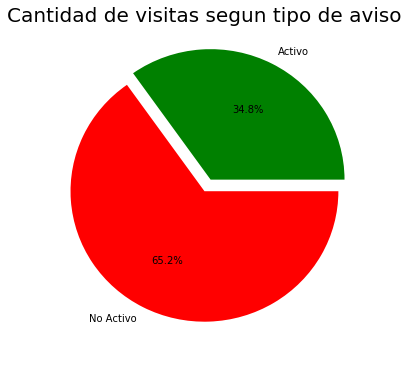

In [9]:
sizes = [avisos[avisos["online"]==True]["online"].count(), avisos[avisos["online"]==False]["online"].count()]
nombres = ['Activo', 'No Activo']

plt.figure(figsize=(6, 6))
plt.title('Cantidad de visitas segun tipo de aviso', fontsize=20)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', colors=['Green', 'red'], explode=(0.1, 0))
plt.show()

Vemos que los acisos que se encuentran activos representan aproximadamente un tercio de los avisos totales que tenemos

# Los datos de vistas que tenemos ¿son todos de avisos activos?

In [10]:
vistas = pd.read_csv('/home/luupesado/7506_Datos/2018/datos_navent_fiuba/fiuba_3_vistas.csv')

In [11]:
avisos_online["online"] = True 
vistas_activas = vistas.join(avisos_online.set_index("idaviso"), on="idAviso", how='inner')

In [12]:
vistas_activas['online'].value_counts()

True    760068
Name: online, dtype: int64

Deducimos que el data set de vistas sólo posee datos activos 

## ¿Cuales son los 5 avisos con mayor tasa de conversión?

Esta pregunta se encontraba tambien el el segundo finger, por lo que la hicimos en spark, tambien.

Llamamos tasa de conversio a las postulaciones al anuncio sobre las visitas totales que tuvo el mismo

In [3]:
vistas = sc.textFile('/home/luupesado/7506_Datos/2018/datos_navent_fiuba/fiuba_3_vistas.csv', 10)
postulaciones = sc.textFile('/home/luupesado/7506_Datos/2018/datos_navent_fiuba/fiuba_4_postulaciones.csv', 10)

In [4]:
postulaciones.take(5)

[u'idaviso,idpostulante,fechapostulacion',
 u'1112257047,NM5M,2018-01-15 16:22:34',
 u'1111920714,NM5M,2018-02-06 09:04:50',
 u'1112346945,NM5M,2018-02-22 09:04:47',
 u'1112345547,NM5M,2018-02-22 09:04:59']

In [5]:
vistas.take(5)

[u'idAviso,timestamp,idpostulante',
 u'1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z',
 u'1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR',
 u'1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd',
 u'1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv']

Averiguo para que periodo tengo tanto vistas como postulaciones, haciendo caso a la Nota 2.

Nota2: Tener en cuenta también que los datos de vistas están incompletos. Solo podrá obtenerse la tasa de conversión para el período donde se tengan ambas informaciones (postulaciones y vistas).

In [6]:
vistas_periodo = vistas.map(lambda x: x.split(',')).map(lambda z: z[1].split('T')).map(lambda y: (y[0],1)).reduceByKey(lambda a,b: a+b).takeOrdered(60, lambda f: f[0])

Tengo vistas solo desde el 23/2 al 28/2

In [7]:
postulaciones_periodo = postulaciones.map(lambda x: x.split(',')).map(lambda y: (y[2],1)).reduceByKey(lambda a,b: a+b).takeOrdered(5, lambda f: f[0])

In [8]:
postulaciones_periodo

[(u'2018-01-15 00:00:01', 1),
 (u'2018-01-15 00:00:02', 1),
 (u'2018-01-15 00:00:09', 1),
 (u'2018-01-15 00:00:10', 1),
 (u'2018-01-15 00:00:11', 1)]

Las Postulaciones comienzan el 15/1

Ahora voy a comenzar a resolver el ejercicio obteniendo la cantidad de visitas que tuvo cada aviso

In [9]:
cant_vistas = vistas.map(lambda x: x.split(',')).map(lambda y: (y[0], 1)).reduceByKey(lambda a,b: a+b)

In [10]:
cant_vistas.take(5)

[(u'1112366334', 557),
 (u'1112269789', 76),
 (u'1112312760', 84),
 (u'1112288001', 48),
 (u'1112192023', 8)]

Ahora calculo el promedio de la cantidad de visitas de cada aviso, haciendo caso a la Nota1 y evitando así equivocarme con "la ecuación más peligrosa de la historia", filtro los que tienen menos de un %25 de las visitas promedio.

Nota1: Tener en cuenta que es posible que por ejemplo un anuncio con una visita y una postulación quede primero. Para evitar este inconveniente, tomar únicamente los avisos que poseen al menos un 25% de las visitas promedio que poseen los avisos. Por ejemplo, si el promedio de visitas de los avisos es 100, tomar solo los avisos que tengan al menos 25 visitas.

In [11]:
promedio = cant_vistas.map(lambda x: (1, x[1])).reduceByKey(lambda a,b: a+b)

In [12]:
promedio.take(1)[0]

(1, 961898)

In [13]:
promedio = promedio.take(1)[0][1]/cant_vistas.count()

In [14]:
promedio

128

In [15]:
cant_vistas = cant_vistas.filter(lambda x: x[1]>(promedio/4))

Ahora calculo la cantidad de postulaciones para cada publicacion en ese período

In [16]:
cant_postulaciones = postulaciones.map(lambda x: x.split(',')).map(lambda y: (y[0], y[2].split(' ')[0], 1)).filter(lambda z: z[1]>='2018-02-23' and z[1]<='2018-02-28').map(lambda v: (v[0], v[2])).reduceByKey(lambda a,b: a+b)

In [17]:
cant_postulaciones.take(5)

[(u'1112366334', 227),
 (u'1112269789', 19),
 (u'1112312760', 43),
 (u'1112312098', 18),
 (u'1112323355', 26)]

Ahora uno la cantidad de postulaciones con la cantidad de visitas para cada sitio para poder calcular la tasa de conversión. Corresponde un inner join ya que la consigna especifica que la tasa se calcule para los avisos que tengan tanto visitas como postulaciones.

In [18]:
tasa = cant_postulaciones.join(cant_vistas).map(lambda x: (x[0], float(x[1][0])/float(x[1][1])))

In [19]:
cant_postulaciones.join(cant_vistas).take(5)

[(u'1112366334', (227, 557)),
 (u'1112312760', (43, 84)),
 (u'1112323355', (26, 132)),
 (u'1112269789', (19, 76)),
 (u'1112335406', (142, 414))]

In [20]:
tasa.take(5)

[(u'1112366334', 0.40754039497307004),
 (u'1112312760', 0.5119047619047619),
 (u'1112323355', 0.19696969696969696),
 (u'1112269789', 0.25),
 (u'1112335406', 0.34299516908212563)]

In [21]:
mayor_tasa = tasa.takeOrdered(5, lambda x: -x[1])

In [22]:
rdd_tasa = sc.parallelize(mayor_tasa)

In [23]:
rdd_tasa.take(5)

[(u'1112355348', 2.0912052117263844),
 (u'1112365531', 1.6677814938684503),
 (u'1112343233', 1.5833333333333333),
 (u'1112299671', 1.5633802816901408),
 (u'1112357810', 1.4901960784313726)]

<Container object of 5 artists>

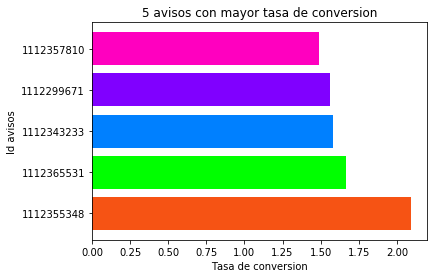

In [24]:
bar_ids = rdd_tasa.map(lambda x: x[0]).take(5)
bar_tasa = rdd_tasa.map(lambda y: y[1]).take(5)
fig, ax = plt.subplots()
ax.set_yticks([0,1,2,3,4])
ax.set_yticklabels(bar_ids)
ax.set_title('5 avisos con mayor tasa de conversion')
ax.set_xlabel('Tasa de conversion')
ax.set_ylabel('Id avisos')
ax.barh([0,1,2,3,4], bar_tasa, color = ['#f65314', '#00ff00', '#0080ff', '#8000ff', '#ff00bf'])

Averiguamos ahora, con pandas, que son cada uno de estos avisos. Desde el  5to al 1er pusto

In [28]:
avisos_detalles.loc[avisos_detalles['idaviso'].isin(bar_ids)]

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
1910,1112343233,1,Operario Técnico p/ Mantenimiento Z/ Morón,"<p>Seleccionaremos para empresa de Caucho, ubi...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Mantenimiento,EXTRAMEN SERVICIOS EVENTUALES S.R.L
4509,1112299671,1,Operario de Producción,<p>Para una importante empresa de Manufactura ...,Gran Buenos Aires,NaN,NaN,Full-time,Otro,Producción,EBM Consultores
4677,1112355348,1,Operarios de Carga y Descarga - Zona San Martin,<p><strong>Adecco Outsourcing</strong> es la l...,Gran Buenos Aires,NaN,NaN,Full-time,Junior,Producción,Adecco -Sales & Marketing
4812,1112357810,1,Chóferes instaladores - Internet Banda Ancha F...,<p>Formar parte de la planta de Técnicos e Ins...,Gran Buenos Aires,NaN,NaN,Full-time,Junior,Internet,FS
5351,1112365531,1,Operarias/or producción - Zona San Martín,<p><strong>Adecco Outsourcing</strong> es la l...,Gran Buenos Aires,NaN,NaN,Full-time,Junior,Producción,Adecco -Sales & Marketing


ES curioso que los anuncios con mayor tasa de conversion buscan todos a operarios/as. el unico anuncio que no tinee esto en el título tiene una palabra similar: instalador. Son tambien todos full-time, aunque con distintos grados de seniority.

## ¿Cómo se relaciona el nivel educativo de los postulantes con los datos que tenemos de los anuncios a los que se postulan?

Vamos a agarrar el set de datos de postulaciones y lo vamos a unir con el tipo de educacion de cada postulante

In [19]:
postulantes_educacion = postulantes_educacion.loc[:,['idpostulante', 'nombre-estado']]

In [22]:
postulaciones = pd.merge(postulaciones, postulantes_educacion, on='idpostulante', how = 'left')

Y ahora le vamos a agregar los datos de cada aviso

In [25]:
avisos_detalles = avisos_detalles.loc[:,['idaviso', 'tipo_de_trabajo', 'nivel_laboral', 'nombre_area', 'denominacion_empresa']]

In [26]:
avisos_detalles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13534 entries, 0 to 13533
Data columns (total 5 columns):
idaviso                 13534 non-null int64
tipo_de_trabajo         13534 non-null object
nivel_laboral           13534 non-null object
nombre_area             13534 non-null object
denominacion_empresa    13529 non-null object
dtypes: int64(1), object(4)
memory usage: 528.7+ KB


Elimino tildes así despues no tengo que estar luchando con eso

In [28]:
avisos_detalles['tipo_de_trabajo'] = avisos_detalles['tipo_de_trabajo'].astype('string')
avisos_detalles['tipo_de_trabajo'] = avisos_detalles['tipo_de_trabajo'].apply(lambda x: elimina_tildes(x.decode('utf-8')))

avisos_detalles['nivel_laboral'] = avisos_detalles['nivel_laboral'].astype('string')
avisos_detalles['nivel_laboral'] = avisos_detalles['nivel_laboral'].apply(lambda x: elimina_tildes(x.decode('utf-8')))

avisos_detalles['nombre_area'] = avisos_detalles['nombre_area'].astype('string')
avisos_detalles['nombre_area'] = avisos_detalles['nombre_area'].apply(lambda x: elimina_tildes(x.decode('utf-8')))

avisos_detalles['denominacion_empresa'] = avisos_detalles['denominacion_empresa'].astype('string')
avisos_detalles['denominacion_empresa'] = avisos_detalles['denominacion_empresa'].apply(lambda x: elimina_tildes(x.decode('utf-8')))

In [29]:
import unicodedata
def elimina_tildes(s):
   return ''.join((c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn'))

def eliminar_tildes_dict(keys):
    kdict = {}
    for k in keys:
        kdict[k] = elimina_tildes(k.decode('utf-8'))
    
    return kdict

In [30]:
avisos_detalles['tipo_de_trabajo'] = avisos_detalles['tipo_de_trabajo'].astype('category')
avisos_detalles['nivel_laboral'] = avisos_detalles['nivel_laboral'].astype('category')
avisos_detalles['nombre_area'] = avisos_detalles['nombre_area'].astype('category')

In [31]:
avisos_detalles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13534 entries, 0 to 13533
Data columns (total 5 columns):
idaviso                 13534 non-null int64
tipo_de_trabajo         13534 non-null category
nivel_laboral           13534 non-null category
nombre_area             13534 non-null category
denominacion_empresa    13534 non-null object
dtypes: category(3), int64(1), object(1)
memory usage: 271.3+ KB


In [32]:
postulaciones = pd.merge(postulaciones, avisos_detalles, on='idaviso', how = 'left')

In [33]:
postulaciones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3401623 entries, 0 to 3401622
Data columns (total 8 columns):
idaviso                 int64
idpostulante            object
fechapostulacion        object
nombre-estado           category
tipo_de_trabajo         category
nivel_laboral           category
nombre_area             category
denominacion_empresa    object
dtypes: category(4), int64(1), object(3)
memory usage: 146.0+ MB


### Comienzo con un heatmap relacionando las categorías nombre-estado y tipo_de_trabajo

In [34]:
pd.crosstab(index=postulaciones['nombre-estado'],
            columns=[postulaciones['tipo_de_trabajo']], margins=True)

tipo_de_trabajo,Fines de Semana,Full-time,Part-time,Pasantia,Por Contrato,Por Horas,Primer empleo,Teletrabajo,Temporario,All
nombre-estado,,,,,,,,,,
Otro - Abandonado,4,1980,114,1,1,38,0,0,8,2146
Otro - En Curso,3,1682,203,2,3,18,0,2,10,1923
Otro - Graduado,10,9535,998,16,15,86,0,13,47,10720
Secundario - Abandonado,26,28175,1731,9,41,387,2,18,105,30494
Secundario - En Curso,64,36388,5209,71,37,439,2,45,128,42383
Secundario - Graduado,585,743740,111323,976,785,4956,21,861,3248,866495
Terciario/Tecnico - Abandonado,23,37598,5843,47,62,142,0,55,112,43882
Terciario/Tecnico - En Curso,107,124640,26722,502,144,560,6,194,433,153308
Terciario/Tecnico - Graduado,166,185040,26000,522,239,774,10,261,722,213734


In [37]:
ind = postulaciones['nombre-estado']
cols = [postulaciones['tipo_de_trabajo']]

table = pd.crosstab(index= ind,columns= cols, margins=True, normalize = 'columns')

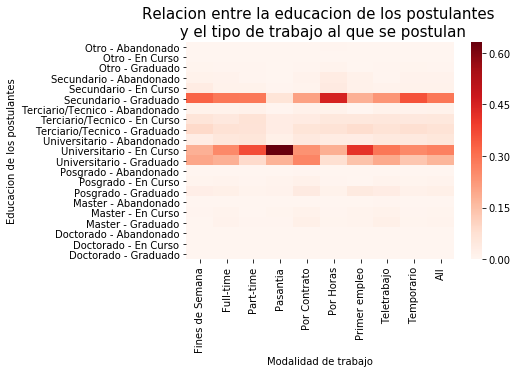

In [38]:
ax = plt.axes()
ind = postulaciones['nombre-estado']
data = pd.crosstab(index= ind,
            columns=[postulaciones['tipo_de_trabajo']], margins=True, normalize = 'columns')
sns.heatmap(data, cmap = 'Reds')
ax.set_title('Relacion entre la educacion de los postulantes \n y el tipo de trabajo al que se postulan', size = 15)
ax.set_ylabel('Educacion de los postulantes')
ax.set_xlabel('Modalidad de trabajo')

La vizualización no es muy clara, pero si se nota la innegable relación entre las pasantías y primer empleo y los postulantes con nivel universitario en curso. Sin embargo, al haber pocos de algunos niveles de estudio en comparacion con otros se hace dificil la lectura del heatmap

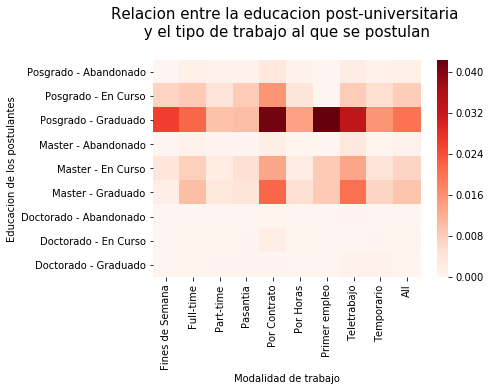

In [39]:
ax = plt.axes()
sns.heatmap( table.loc[[#'Otro - Abandonado',
 #'Otro - En Curso',                                        
 #'Otro - Graduado', 
# 'Terciario/Tecnico - Abandonado',
 #'Terciario/Tecnico - En Curso',
 #'Terciario/Tecnico - Graduado',
 'Posgrado - Abandonado',
 'Posgrado - En Curso',
 'Posgrado - Graduado',
 'Master - Abandonado',
 'Master - En Curso',
 'Master - Graduado',
'Doctorado - Abandonado',
 'Doctorado - En Curso',
 'Doctorado - Graduado'],:], cmap = 'Reds')
ax.set_title('Relacion entre la educacion post-universitaria \n y el tipo de trabajo al que se postulan \n', size = 15)
ax.set_ylabel('Educacion de los postulantes')
ax.set_xlabel('Modalidad de trabajo')

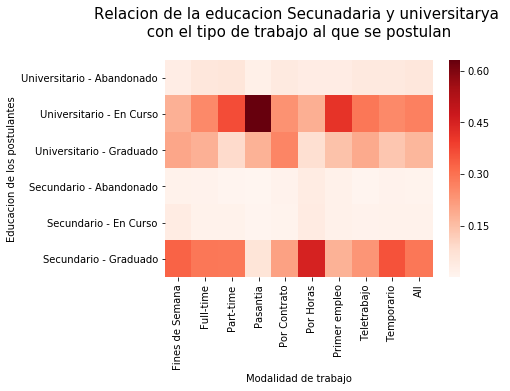

In [40]:
ax = plt.axes()
sns.heatmap( table.loc[[
 'Universitario - Abandonado',
 'Universitario - En Curso',
 'Universitario - Graduado','Secundario - Abandonado',
 'Secundario - En Curso',
 'Secundario - Graduado'],:], cmap = 'Reds')
ax.set_title('Relacion de la educacion Secunadaria y universitarya \n con el tipo de trabajo al que se postulan \n', size = 15)
ax.set_ylabel('Educacion de los postulantes')
ax.set_xlabel('Modalidad de trabajo')

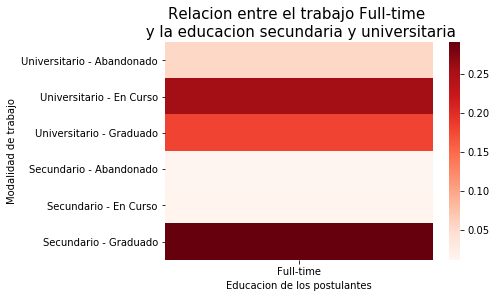

In [46]:
ax = plt.axes()
sns.heatmap(table.loc[[
 'Universitario - Abandonado',
 'Universitario - En Curso',
 'Universitario - Graduado','Secundario - Abandonado',
 'Secundario - En Curso',
 'Secundario - Graduado'],['Full-time']],cmap = 'Reds')
ax.set_title('Relacion entre el trabajo Full-time \n y la educacion secundaria y universitaria', size = 15)
ax.set_xlabel('Educacion de los postulantes')
ax.set_ylabel('Modalidad de trabajo')

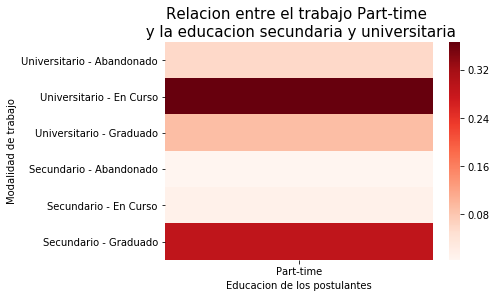

In [47]:
ax = plt.axes()
sns.heatmap(table.loc[[
 'Universitario - Abandonado',
 'Universitario - En Curso',
 'Universitario - Graduado','Secundario - Abandonado',
 'Secundario - En Curso',
 'Secundario - Graduado'],['Part-time']],cmap = 'Reds')
ax.set_title('Relacion entre el trabajo Part-time \n y la educacion secundaria y universitaria', size = 15)
ax.set_xlabel('Educacion de los postulantes')
ax.set_ylabel('Modalidad de trabajo')

## Relacionamos ahora las categorías nombre-estado y nivel laboral


In [48]:
ind = postulaciones['nombre-estado']
cols = [postulaciones['nivel_laboral']]

table = pd.crosstab(index= ind,columns= cols, margins=True, normalize = 'index')

In [49]:
pd.crosstab(index= ind,columns= cols, margins=True)

nivel_laboral,Gerencia / Alta Gerencia / Direccion,Jefe / Supervisor / Responsable,Junior,Otro,Senior / Semi-Senior,All
nombre-estado,,,,,,
Otro - Abandonado,7,15,399,305,1420,2146
Otro - En Curso,2,20,371,225,1305,1923
Otro - Graduado,33,158,2020,1315,7194,10720
Secundario - Abandonado,47,393,5543,4140,20371,30494
Secundario - En Curso,88,478,8813,5216,27788,42383
Secundario - Graduado,2556,12971,179511,94924,576533,866495
Terciario/Tecnico - Abandonado,286,1076,9223,4059,29238,43882
Terciario/Tecnico - En Curso,518,2336,37361,13897,99196,153308
Terciario/Tecnico - Graduado,1336,5485,45759,17916,143238,213734


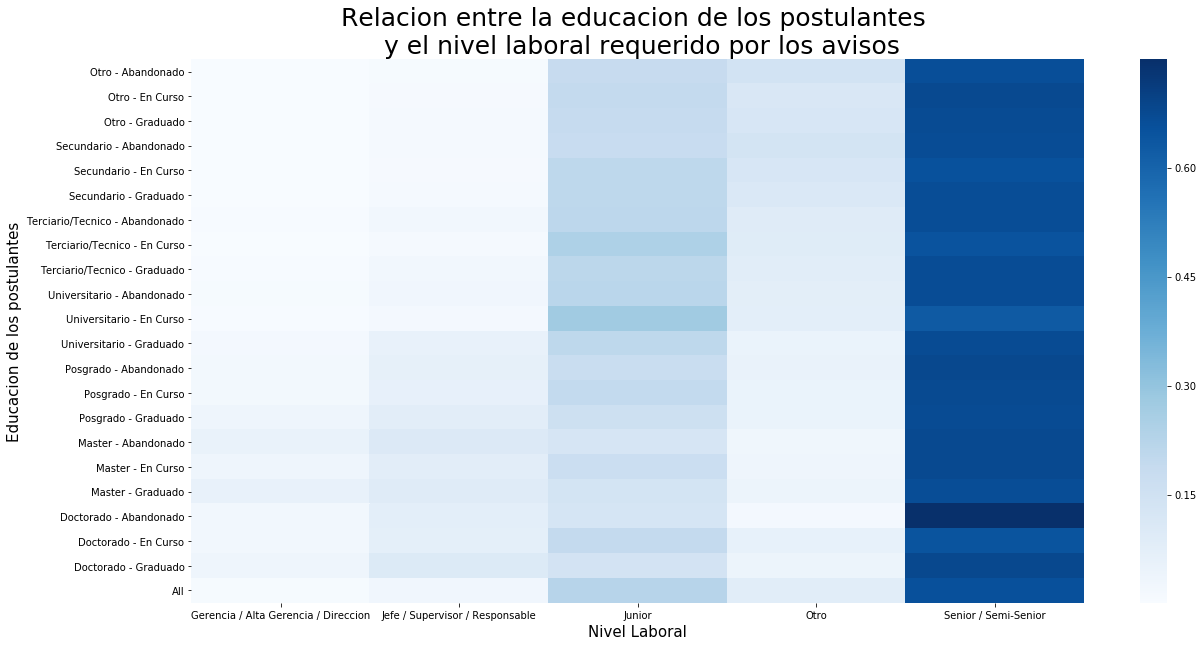

In [50]:
fig, ax = plt.subplots(figsize = (20,10))
sns.heatmap(table ,cmap = 'Blues')
ax.set_title('Relacion entre la educacion de los postulantes \n y el nivel laboral requerido por los avisos', size = 25)
ax.set_ylabel('Educacion de los postulantes', size = 15)
ax.set_xlabel('Nivel Laboral', size= 15)

## Relacionamos ahora las categorías nombre-estado y  el area

In [51]:
postulaciones['nombre_area'].value_counts().head(10).index

CategoricalIndex([u'Ventas', u'Administracion', u'Produccion', u'Comercial',
                  u'Atencion al Cliente', u'Recepcionista', u'Call Center',
                  u'Telemarketing', u'Tesoreria', u'Mantenimiento y Limpieza'],
                 categories=[u'Abastecimiento', u'Administracion', u'Administracion de Base de Datos', u'Administracion de Personal', u'Administracion de Seguros', u'Almacen / Deposito / Expedicion', u'Analisis Funcional', u'Analisis de Riesgos', ...], ordered=False, dtype='category')

In [57]:
ind = postulaciones['nombre-estado']
cols = postulaciones['nombre_area']
table = pd.crosstab(index= ind,columns= [cols], 
                     margins=True, normalize = 'index')

In [58]:
pd.crosstab(index= ind,columns= cols, margins=True)

nombre_area,Abastecimiento,Administracion,Administracion de Base de Datos,Administracion de Personal,Administracion de Seguros,Almacen / Deposito / Expedicion,Analisis Funcional,Analisis de Riesgos,Apoderado Aduanal,Arquitectura,...,Topografia,Trabajo Social,Transporte,Turismo,Urbanismo,Venta de Seguros,Ventas,Ventas Internacionales/Exportacion,Veterinaria,All
nombre-estado,,,,,,,,,,,,,,,,,,,,,
Otro - Abandonado,7,53,0,51,0,72,0,0,0,0,...,0,0,83,3,0,1,141,0,0,2146
Otro - En Curso,7,95,0,32,2,42,3,1,0,5,...,0,0,22,0,0,0,237,3,0,1923
Otro - Graduado,35,434,0,146,13,263,8,5,1,3,...,0,0,205,9,0,15,1109,4,2,10720
Secundario - Abandonado,179,573,0,438,10,1424,5,4,0,6,...,0,1,981,12,0,4,2698,17,0,30494
Secundario - En Curso,296,986,0,607,14,1524,17,9,5,18,...,0,2,597,33,0,15,6521,26,2,42383
Secundario - Graduado,4819,49575,75,7266,730,27435,375,296,59,357,...,0,30,9539,618,2,728,144349,605,10,866495
Terciario/Tecnico - Abandonado,177,4443,6,357,83,905,31,35,2,48,...,0,3,320,64,0,63,7992,46,1,43882
Terciario/Tecnico - En Curso,506,16030,33,1632,255,2258,293,158,34,89,...,0,5,630,253,0,195,25095,388,2,153308
Terciario/Tecnico - Graduado,700,22100,24,2549,349,3394,390,180,74,184,...,0,4,1037,424,2,274,30846,631,18,213734


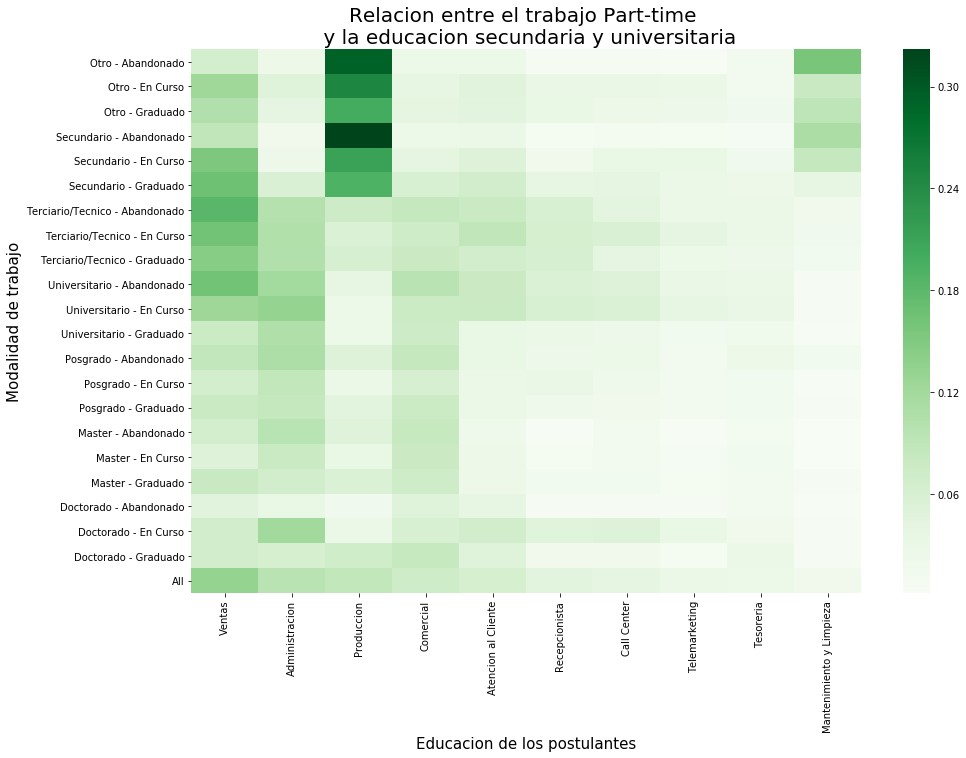

In [59]:
fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(table.loc[:,[u'Ventas', u'Administracion', u'Produccion', u'Comercial',
                  u'Atencion al Cliente', u'Recepcionista', u'Call Center',
                  u'Telemarketing', u'Tesoreria', u'Mantenimiento y Limpieza']],cmap = 'Greens')
ax.set_title('Relacion entre el trabajo Part-time \n y la educacion secundaria y universitaria', size = 20)
ax.set_xlabel('Educacion de los postulantes', size = 15)
ax.set_ylabel('Modalidad de trabajo', size = 15)

## ¿Como se relaciona la cantidad de vistas  por area con el sexo de los postulentes?

In [ ]:
avisos_detalles = pd.read_csv('/home/luupesado/7506_Datos/2018/datos_navent_fiuba/fiuba_6_avisos_detalle.csv')
vistas=pd.read_csv("/home/luupesado/7506_Datos/2018/datos_navent_fiuba/fiuba_3_vistas.csv")
postulantes_genero_edad = pd.read_csv("/home/luupesado/7506_Datos/2018/datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv")

In [ ]:
avisos_con_area=avisos_detalles[["idaviso","nombre_area"]]

In [7]:
visitas_con_datos = vistas.join(postulantes_genero_edad.set_index('idpostulante'), on='idpostulante',how='left')
visitas_con_datos = visitas_con_datos.join(avisos_con_area.set_index('idaviso'), on='idAviso',how='left')
visitas_hombre=visitas_con_datos[visitas_con_datos["sexo"]=="MASC"]
visitas_mujer=visitas_con_datos[visitas_con_datos["sexo"]=="FEM"]
visitas_nan=visitas_con_datos[visitas_con_datos["sexo"]=="NO_DECLARA"]

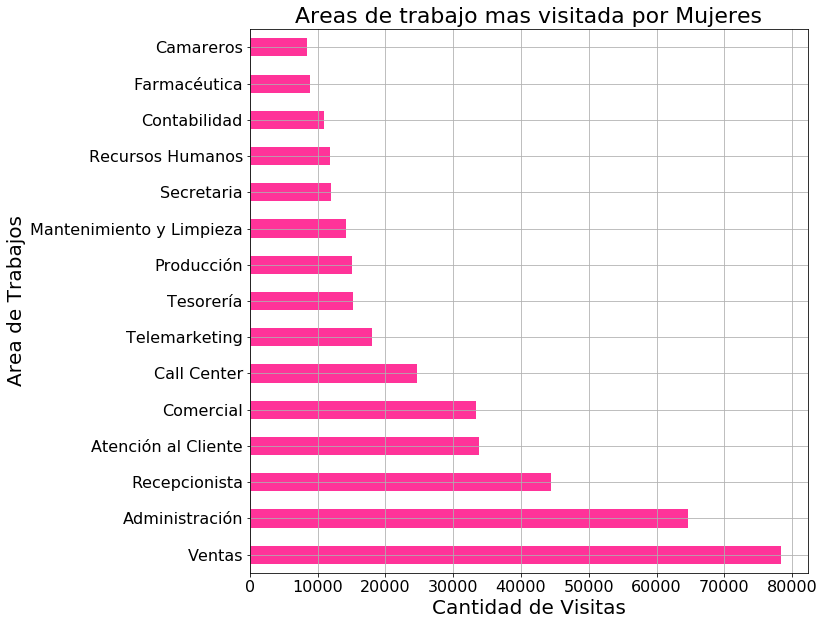

In [10]:
visitas_mujer["nombre_area"].value_counts().head(15).plot(kind="barh",rot=0,figsize=(10,10),color='#ff3399',fontsize=16,grid=True);
plt.title('Areas de trabajo mas visitada por Mujeres', fontsize=22);
plt.xlabel('Cantidad de Visitas', fontsize=20);
plt.ylabel('Area de Trabajos', fontsize=20);

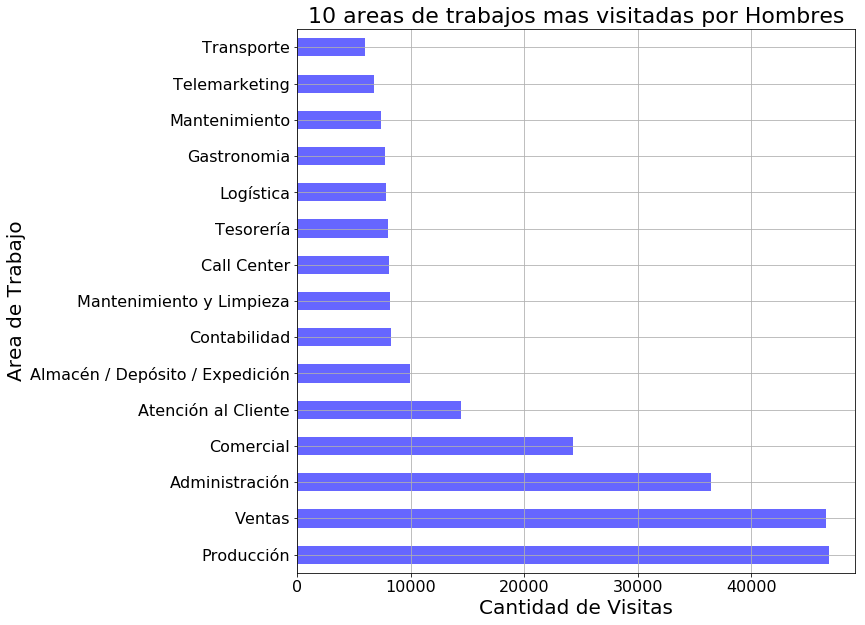

In [9]:
visitas_hombre["nombre_area"].value_counts().head(15).plot(kind="barh",rot=0,figsize=(10,10),color='#6666ff',fontsize=16,grid=True);
plt.title('Areas de trabajos mas visitadas por Hombres', fontsize=22);
plt.xlabel('Cantidad de Visitas', fontsize=20);
plt.ylabel('Area de Trabajo', fontsize=20);

In [29]:
visitas_nan["nombre_area"].value_counts().head(15).plot(kind="barh",rot=0,figsize=(10,10),color='#990099',fontsize=16,grid=True);
plt.title('Areas de trabajo mas visitada por personas que no definen su sexo', fontsize=22);
plt.xlabel('Cantidad de Visitas', fontsize=20);
plt.ylabel('Area de Trabajos', fontsize=20);

NameError: name 'visitas_mujer' is not defined

Vemos que el sexo de los postulantes influye mucho en las areas más vistas por ellos. Mientras que el area favorita de los hombre es produccion, para las mujeres se encuentra en el puesto número 9 y con menos de un cuarto de vistas que en su area favorita:ventas.

Ventas es el area mas solictada en general y tanto en hombre como en mujeres se encuentra como favorita. 

Otra de las areas favoritas de las mujeres es Recepcion, area que ni siquiera aparece en el top 15 del rubro masculino